###**Sources**
 -  =>  données : https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset
 -  => sujet pdf : https://drive.google.com/drive/folders/1IDLeLX15FVJnp-39Gn5Q67baGqP96d68

###**Problématique** ==>
Notre entreprise souhaite s’implanter dans le marché automobile avec un nouveau concept de voiture thermique moins polluante. Nous avons besoin d’avoir une idée de l’histoire de l’automobile et de ses principaux marchés.
- **KPI** : 5 indicateurs sur le monde automobile (ex. Quelles marques produisent
les voitures qui consomment le moins ? Quelles sont les consommations ? Quelle région produit le plus de voitures ?)
- **Prédiction** :  Pour la création de nos voitures et la sélection de nos moteurs, nous souhaitons connaître les consommations estimées dans le futur. Pour cela, vous devrez fournir une prédiction de la consommation des voitures (pour des véhicules 100% thermiques) dans les années à venir.

###**Dictionnaire des données** ==> 398 lignes x 9 colonnes
- **name**: Identifiant pour chaque véhicule -- type string -- 305 valeurs uniques sur 398 lignes donc présence doublons ?
- **mpg**: Efficacité énergétique mesurée en miles par gallon (indic consommation) -- type float -- valeurs comprises entre 9 et 46.6 (cf describe)
- **cylinders**: Nombre de cylindres dans le moteur (indic puissance) -- type int -- 5 valeurs uniques qui sont 3,4,5,6,8
- **displacement**: Cylindrée du moteur, indiquant sa taille ou sa capacité (indic puissance) -- type float -- valeurs comprises entre 68 et 455
- **horsepower**: Puissance de sortie du moteur -- type float -- 6 valeurs manquantes -- valeurs comprises entre 46 et 230
- **weight**: Poids du véhicule -- type int -- valeurs comprises entre 1613 et 5140
- **acceleration**: Capacité à augmenter la vitesse, mesurée en secondes -- type float -- valeurs comprises entre 8 et 24.8
- **model_year**: Année de fabrication du modèle -- type int -- 13 valeurs possibles comprises entre 70 et 82 inclus (donc modèles anciens)
- **origin**: Pays ou région d'origine de chaque modèle de véhicule -- type string -- 3 valeurs possibles 'usa' (249 valeurs), 'japan' (79 valeurs), 'europe' (70 valeurs)

In [ ]:
# import pandas as pd
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# df = pd.read_csv(list(uploaded.keys())[0])
# df

In [ ]:
# Lire le fichier / import des données [suppose d'enrgistrer le fichier .csv dans le drive perso de chacune directement à la racine]
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Automobile.csv")

# Affiche les premières lignes du DataFrame
display(df.head(100))

Mounted at /content/drive


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
95,buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,usa
96,amc ambassador brougham,13.0,8,360.0,175.0,3821,11.0,73,usa
97,plymouth valiant,18.0,6,225.0,105.0,3121,16.5,73,usa
98,chevrolet nova custom,16.0,6,250.0,100.0,3278,18.0,73,usa


#**Analyse préliminaire de la base de donnée**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
### Check : type des valeurs pour chaque colonne =>
colonnes_df = df.columns
for col in colonnes_df:
  print(f"Colonne {col} de type {df[col].dtype}")

Colonne name de type object
Colonne mpg de type float64
Colonne cylinders de type int64
Colonne displacement de type float64
Colonne horsepower de type float64
Colonne weight de type int64
Colonne acceleration de type float64
Colonne model_year de type int64
Colonne origin de type object


In [ ]:
### Check : nombre valeurs uniques pour chaque colonne =>
print(f"Nombre total de lignes dans dataframe : {len(df)}")
colonnes_df = df.columns
for col in colonnes_df:
  if df[col].nunique() < 15:
    print(f"Colonne {col} : {df[col].nunique()} valeurs uniques qui sont {df[col].unique()}")
  else:
    print(f"Colonne {col} : {df[col].nunique()} valeurs uniques")

Nombre total de lignes dans dataframe : 398
Colonne name : 305 valeurs uniques
Colonne mpg : 129 valeurs uniques
Colonne cylinders : 5 valeurs uniques qui sont [8 4 6 3 5]
Colonne displacement : 82 valeurs uniques
Colonne horsepower : 93 valeurs uniques
Colonne weight : 351 valeurs uniques
Colonne acceleration : 95 valeurs uniques
Colonne model_year : 13 valeurs uniques qui sont [70 71 72 73 74 75 76 77 78 79 80 81 82]
Colonne origin : 3 valeurs uniques qui sont ['usa' 'japan' 'europe']


In [ ]:
### Check : lignes en doublon dans l'intégralité du df
# keep=False affiche toutes les occurrences en doublon
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)

Empty DataFrame
Columns: [name, mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin]
Index: []


In [ ]:
### Check : valeurs 'name' en doublon
# keep=first garde la première occurrence et considère les lignes suivantes en doublon / à vérifier
duplicated_rows_name = df[df.duplicated(subset=['name'], keep='first')]
display(duplicated_rows_name)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
29,datsun pl510,27.0,4,97.0,88.0,2130,14.5,71,japan
33,amc gremlin,19.0,6,232.0,100.0,2634,13.0,71,usa
35,chevrolet chevelle malibu,17.0,6,250.0,100.0,3329,15.5,71,usa
38,chevrolet impala,14.0,8,350.0,165.0,4209,12.0,71,usa
40,ford galaxie 500,14.0,8,351.0,153.0,4154,13.5,71,usa
...,...,...,...,...,...,...,...,...,...
363,buick century,22.4,6,231.0,110.0,3415,15.8,81,usa
372,pontiac phoenix,27.0,4,151.0,90.0,2735,18.0,82,usa
381,honda accord,36.0,4,107.0,75.0,2205,14.5,82,japan
382,toyota corolla,34.0,4,108.0,70.0,2245,16.9,82,japan


In [ ]:
## zoom sur qqs 'name' en doublon pour voir l'évolution des caractéristiques (en fonction de la date de construction)
df.loc[df['name'] == 'buick century']

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
160,buick century,17.0,6,231.0,110.0,3907,21.0,75,usa
363,buick century,22.4,6,231.0,110.0,3415,15.8,81,usa


In [ ]:
### description statistique du df
df.describe(include='all')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398
unique,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,ford pinto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa
freq,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249
mean,NaN,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN
std,NaN,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN
min,NaN,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN
25%,NaN,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN
50%,NaN,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN
75%,NaN,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN


In [ ]:
### Check : valeurs manquantes -> 6 dans colonnes 'horsepower' ==> Q° : quel traitement appliquer ? suppression ? remplacement ?
print(df.isna().sum())
display(df.loc[df['horsepower'].isna()])

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [ ]:
### Zoom 'origin' pour identifier la répartition entre 'usa','japan','europe' en pourcentage
df['origin'].value_counts(normalize=True)*100

,proportion
origin,
usa,62.562814
japan,19.849246
europe,17.587940


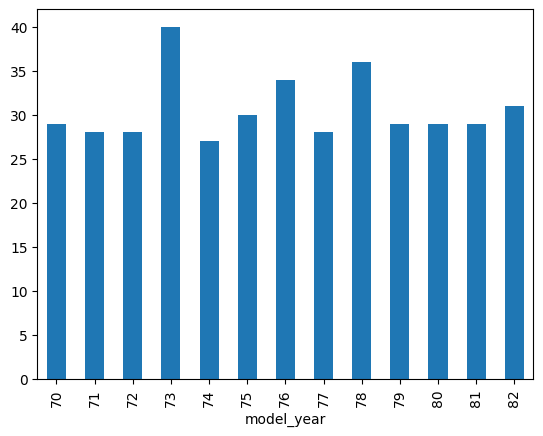

In [ ]:
### Zoom 'model_year' pour identifier la répartition entre les différentes années de fabrication (1970 à 1982)
df['model_year'].value_counts()

# diagramme en barre par année en axe x dans l'ordre chronologique et count en axe y pour
import matplotlib.pyplot as plt
df['model_year'].value_counts().sort_index().plot(kind='bar') # sort_index() pour classer en ordre chronologique l'axe x
plt.show()

# df['model_year'].value_counts().sort_values(ascending=False).plot(kind='bar') # -> pour afficher en ordre décroissant en fonction de l'axe y

In [ ]:
### NETTOYAGE : on remplace les 11 valeurs NaN de la colonne 'horsepower' par 1. la moyenne ou 2. la mediane par regroupement d'origine et année de construction  =>
df_clean = df.copy()
df_clean['flag_horsepower_nan'] = df_clean['horsepower'].isna().astype(int)
# df_clean['horsepower'].fillna(df_clean['horsepower'].mean(), inplace=True)
df_clean['horsepower'] = df_clean.groupby(['origin', 'model_year'])['horsepower'].transform(lambda x: x.fillna(x.median()))
display(df_clean.loc[df_clean['flag_horsepower_nan']==1])
df_clean.isna().sum()
df_clean.drop(columns=['flag_horsepower_nan'], inplace=True)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,flag_horsepower_nan
32,ford pinto,25.0,4,98.0,100.0,2046,19.0,71,usa,1
126,ford maverick,21.0,6,200.0,102.5,2875,17.0,74,usa,1
330,renault lecar deluxe,40.9,4,85.0,67.0,1835,17.3,80,europe,1
336,ford mustang cobra,23.6,4,140.0,90.0,2905,14.3,80,usa,1
354,renault 18i,34.5,4,100.0,76.0,2320,15.8,81,europe,1
374,amc concord dl,23.0,4,151.0,86.0,3035,20.5,82,usa,1


In [ ]:
### Quelques visuels pour donner les tendances

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Liste des colonnes à afficher
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

# Liste des colonnes avec des données continues
continuous_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Créer un subplot 4x2
fig = make_subplots(rows=4, cols=2, subplot_titles=columns)

# Ajouter chaque graphique
for i, column in enumerate(columns):
    row = i // 2 + 1
    col = i % 2 + 1

    if column in continuous_columns:
        # Définir un nombre de bins en fonction de la distribution des données
        num_bins = 20  # Nombre de bins par défaut
        binned_data = pd.cut(df_clean[column], bins=num_bins) #################### TEST df_clean
        binned_counts = binned_data.value_counts().sort_index()  # Sort_index() pour garder l'ordre des bins

        # Préparation des données pour le graphique
        binned_counts_df = binned_counts.reset_index()
        binned_counts_df.columns = [f'{column}_range', 'count']

        # Extraire les bornes inférieures des intervalles
        binned_counts_df[f'{column}_range'] = binned_counts_df[f'{column}_range'].apply(lambda x: x.left)

        # Créer un histogramme avec les valeurs binned
        histogram = go.Bar(x=binned_counts_df[f'{column}_range'], y=binned_counts_df['count'], marker_color='steelblue')
        fig.add_trace(histogram, row=row, col=col)
    else:
        # Pour les données catégorielles, créer un graphique en barres
        value_counts = df_clean[column].value_counts().reset_index() #################### TEST df_clean
        value_counts.columns = [column, 'count']
        bar = go.Bar(x=value_counts[column], y=value_counts['count'], marker_color='steelblue')
        fig.add_trace(bar, row=row, col=col)

# Ajuster la mise en page pour éviter le chevauchement et améliorer la lisibilité
fig.update_layout(
    height=1200, width=1000,
    title_text="Nombre de véhicules par caractéristique",
    showlegend=False,
    margin=dict(t=100, l=50, r=50, b=50)
)

# Ajuster l'alignement des titres et la taille des annotations
for annotation in fig['layout']['annotations']:
    annotation['y'] += 0.03
    annotation['font'] = dict(size=12)

# Ajuster les axes et la mise en forme des graphiques
fig.update_xaxes(showgrid=False, zeroline=False, automargin=True)
fig.update_yaxes(showgrid=False, zeroline=False, automargin=True)

# Affichage du graphique
fig.show()

In [ ]:
# Créer un graphique heatmap en ne sélectionnant que les colonnes numériques pour vérifier les corrélations entre chaque variable en particuliers avec la variable mpg
# Créer un graphique heatmap en ne sélectionnant que les colonnes numériques pour vérifier les corrélations entre chaque variable
import pandas as pd
import plotly.graph_objects as go

# Sélectionner uniquement les colonnes numériques
df_numeric = df_clean.select_dtypes(include=['number'])

# Calculer la matrice de corrélations
correlation_matrix = df_numeric.corr()

# Créer une heatmap avec Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,              # Valeurs de la matrice de corrélations
    x=correlation_matrix.columns,             # Noms des colonnes pour l'axe des x
    y=correlation_matrix.index,               # Noms des lignes pour l'axe des y
    colorscale='RdBu',                        # Palette centrée autour de 0
    colorbar=dict(title='Correlation'),       # Titre de la barre de couleur
    zmin=-1, zmax=1,                          # Fixer les limites des couleurs pour centrer autour de 0
    text=correlation_matrix.round(2).values,  # Afficher les valeurs avec 2 décimales
    hoverinfo='text',                         # Afficher les valeurs lors du survol
))

# Ajouter les étiquettes des données
fig.update_traces(
    texttemplate='%{text}',                   # Afficher les valeurs directement sur la heatmap
    textfont=dict(size=10, color='black')    # Style des étiquettes
)

# Ajuster la mise en page du graphique
fig.update_layout(
    title='Heatmap des Corrélations entre Variables Numériques',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=-45),                # Incliner les étiquettes de l'axe des x pour plus de lisibilité
    yaxis=dict(tickangle=0),                  # Incliner les étiquettes de l'axe des y
    margin=dict(t=60, l=60, r=30, b=60),      # Ajuster les marges
    autosize=True
)

# Affichage du graphique
fig.show()


In [ ]:
# Créer des scatterplot de mpg avec les autres variables et en distinguant éventuellement l'origine (hue = usa, japan, europe)
# => cf. https://www.kaggle.com/code/mahmoudsaadmohamed/car-pridiction-modeling (pour idées graph et partie ML => prédire le mpg)

#**Nettoyage des données**
- traitement des doublons
- gestion des valeurs manquantes
- gestion des valeurs aberrantes
- ajout de colonnes supplémentaires pour améliorer les analyses : ex. 'brand'

In [ ]:
### Proposition // Ajout colonne 'brand' pour donner un axe supplémentaire d'analyse (plus macro que le modèle 'name' mais plus micro que 'origin')
# -> on extrait le premier mot de la colonne 'name' qui semble correspondre à la marque du véhicule et l'ajouter à une nouvelle colonne 'brand'
df_clean['brand'] = df_clean['name'].str.split().str[0]
display(df_clean)
print(f"Colonne brand : {df_clean['brand'].nunique()} valeurs uniques qui sont {df_clean['brand'].unique()}")

## obs : qqs coquilles = chevroelt, toyouta, vokswagen, maxda au lieu de chevrolet, toyota, volkswagen, mazda
##       qqs rapprochement à faire : 'vw' avec 'volkswagen' -- mercedes avec mercedes-benz -- chevy avec chevrolet -- capri avec ford
##       à checker : hi ?

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,vw
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa,ford


Colonne brand : 37 valeurs uniques qui sont ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


In [ ]:
### Remplacer via dictionnaire les variables erronées pour 'brand'
# df_clean = df.copy()
dict_to_replace = {'chevroelt':'chevrolet', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'maxda':'mazda', 'vw':'volkswagen','mercedes':'mercedes-benz','chevy':'chevrolet','capri':'ford'}
df_clean['brand'] = df_clean['brand'].replace(dict_to_replace)
print(f"Colonne brand : {df_clean['brand'].nunique()} valeurs uniques qui sont {df_clean['brand'].unique()}")
# df['brand'].value_counts()

Colonne brand : 29 valeurs uniques qui sont ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'hi' 'mercury' 'opel'
 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault' 'honda' 'subaru'
 'mercedes-benz' 'cadillac' 'triumph' 'nissan']


In [ ]:
# Convertir les colonnes numériques en types appropriés
cols_to_convert = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
df_clean[cols_to_convert] = df_clean[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# # 1. Traitement des doublons
# df.drop_duplicates(inplace=True)

# 2. Gestion des valeurs manquantes pour la colonne 'horsepower'
# Remplir par la médiane selon 'cylinders' et 'displacement'
# Convertir 'horsepower' en numérique avant le groupement
df['horsepower'] = pd.to_numeric(df_clean['horsepower'], errors='coerce')  # Conversion explicite en numérique
df['horsepower'] = df_clean.groupby(['cylinders', 'displacement'])['horsepower'].transform(lambda x: x.fillna(x.median()))




In [ ]:
display(df_clean)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa,ford


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   brand         398 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


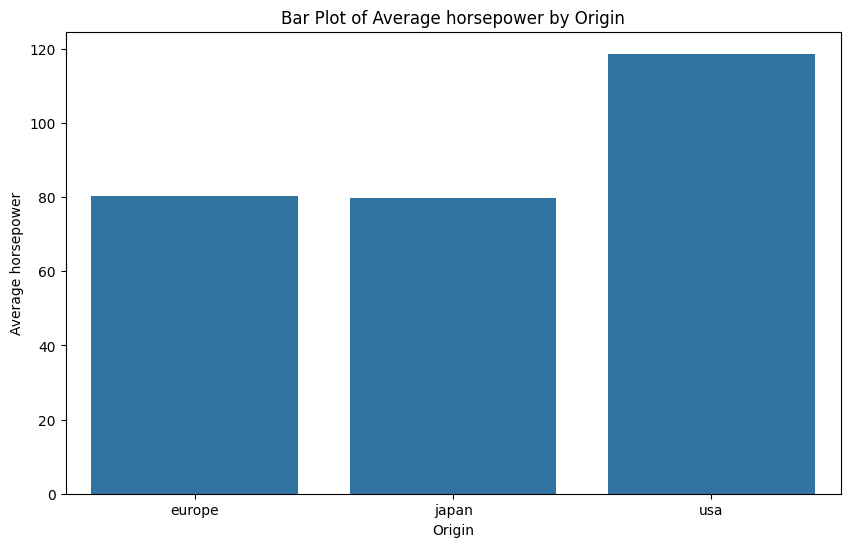

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
avg_mpg_by_origin = df_clean.groupby('origin')['horsepower'].mean().reset_index()
sns.barplot(x='origin', y='horsepower', data=avg_mpg_by_origin)
plt.title('Bar Plot of Average horsepower by Origin')
plt.xlabel('Origin')
plt.ylabel('Average horsepower')
plt.show()

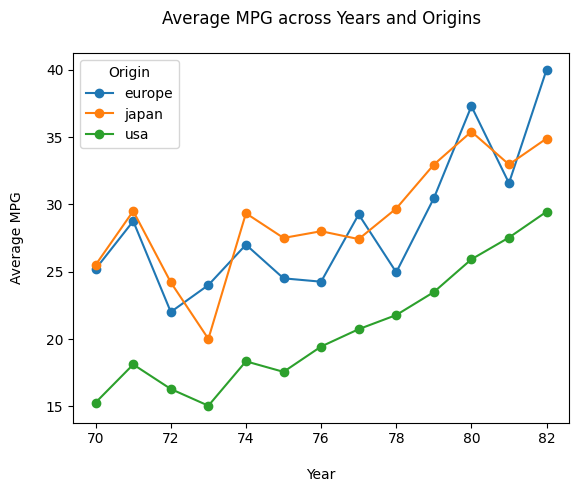

In [ ]:
average_mpg_year_origin = df.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
average_mpg_year_origin.plot(marker='o')
plt.xlabel('\nYear')
plt.ylabel('Average MPG\n')
plt.title('Average MPG across Years and Origins\n')
plt.legend(title='Origin')
plt.show()

#**KPIs**

Quelles marques produisent les voitures qui consomment le moins ?

Quelles sont les consommations ?

TOP 5 des modèles qui consomment le moins avec les meilleures caractéristiques ?

Quelle région produit le plus de voitures qui consomme le moins ?

Quelles seraient les meilleures caractéristiques pour nos modèles ?

## **1. Marques Produisant les Voitures les Moins Consommatrices**

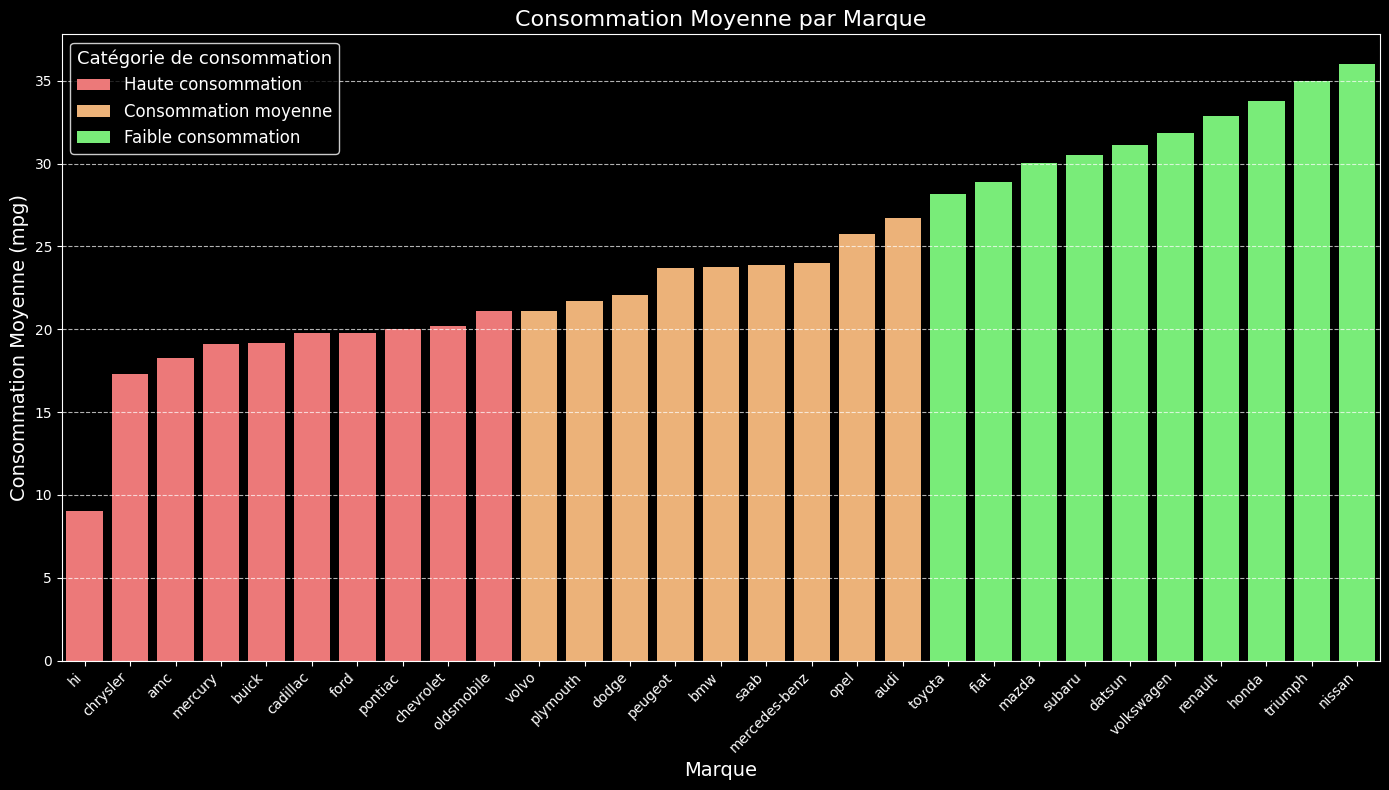

In [ ]:
# Assurez-vous que la colonne 'brand' est bien formatée et que 'avg_mpg_by_brand' est calculé
avg_mpg_by_brand = df_clean.groupby('brand')['mpg'].mean().sort_values()

# Définir les seuils pour les catégories de consommation
bins = [0, avg_mpg_by_brand.quantile(1/3), avg_mpg_by_brand.quantile(2/3), avg_mpg_by_brand.max()]
labels = ['Haute consommation', 'Consommation moyenne', 'Faible consommation']
avg_mpg_by_brand_category = pd.cut(avg_mpg_by_brand, bins=bins, labels=labels)

# Créer un DataFrame avec les catégories
df_avg_mpg_by_brand = pd.DataFrame({
    'brand': avg_mpg_by_brand.index,
    'avg_mpg': avg_mpg_by_brand.values,
    'category': avg_mpg_by_brand_category
})

# Définir la palette de couleurs pastel pour les trois catégories
palette = {
    'Haute consommation': '#FF6666',   # Rouge pastel légèrement plus vif pour fond noir
    'Consommation moyenne': '#FFB266', # Orange pastel légèrement plus vif pour fond noir
    'Faible consommation': '#66FF66'   # Vert pastel légèrement plus vif pour fond noir
}

# Appliquer un style avec fond noir
plt.style.use('dark_background')

# Création du graphique
plt.figure(figsize=(14, 8))
sns.barplot(x='brand', y='avg_mpg', hue='category', data=df_avg_mpg_by_brand, palette=palette)
plt.title('Consommation Moyenne par Marque', fontsize=16, color='white')
plt.xlabel('Marque', fontsize=14, color='white')
plt.ylabel('Consommation Moyenne (mpg)', fontsize=14, color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.legend(title='Catégorie de consommation', title_fontsize='13', facecolor='black', edgecolor='white', fontsize='12')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')
plt.tight_layout()
plt.show()

## **2. Consommations des Marques les Moins Consommatrices**

<ipython-input-23-fabcb37b00a1>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




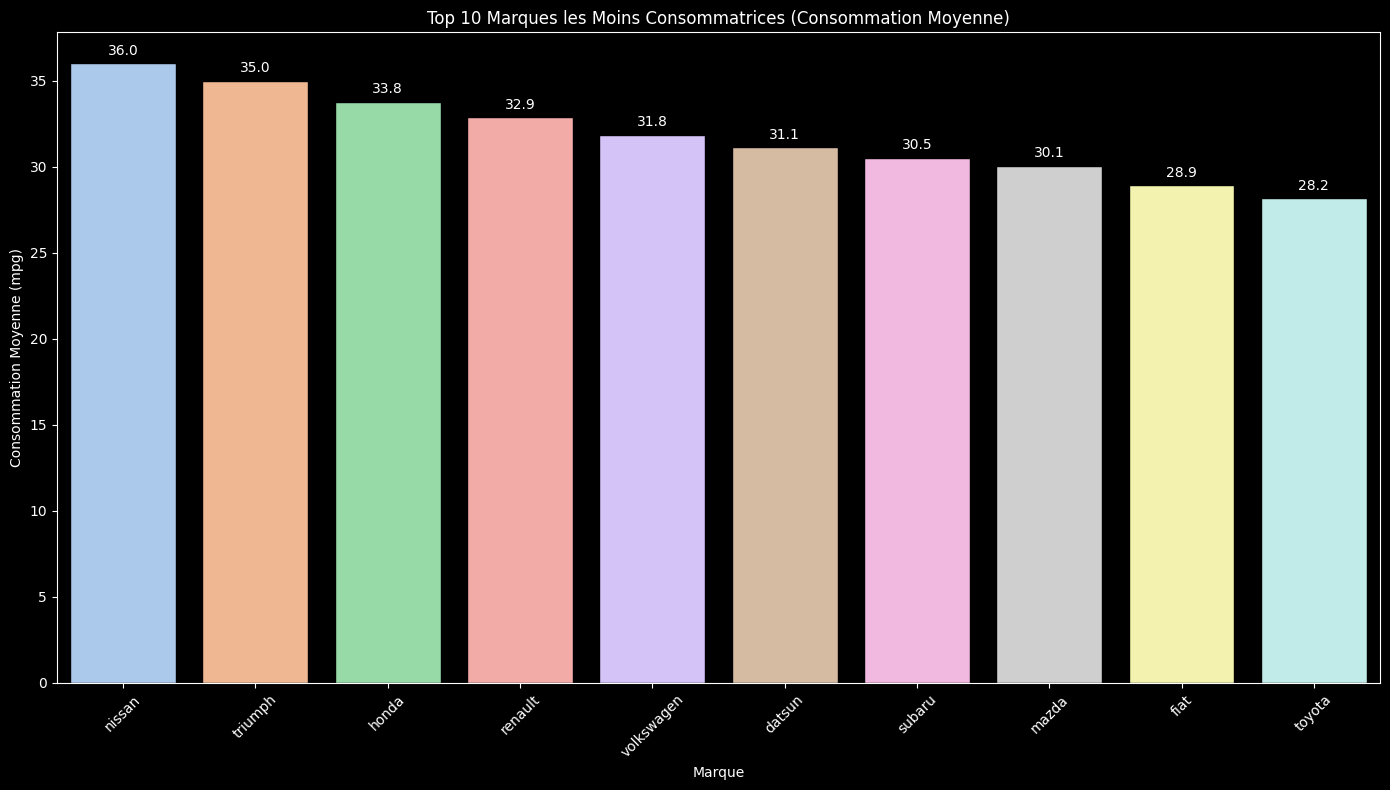

In [ ]:
# Supposons que df est votre DataFrame préparé

# Calculer la consommation moyenne (mpg) par marque
average_mpg_by_brand = df_clean.groupby('brand')['mpg'].mean().reset_index()

# Trier les marques par consommation moyenne, du plus élevé au plus bas
sorted_brands = average_mpg_by_brand.sort_values(by='mpg', ascending=False)

# Sélectionner les 10 marques les plus économes en carburant
top_10_brands = sorted_brands.head(10)
# Appliquer un style avec fond noir
plt.style.use('dark_background')
# Créer le barplot avec des bulles colorées en pastel
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='brand', y='mpg', data=top_10_brands, palette='pastel', edgecolor='black')

# Ajouter des annotations avec les valeurs de consommation
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Top 10 Marques les Moins Consommatrices (Consommation Moyenne)')
plt.xlabel('Marque')
plt.ylabel('Consommation Moyenne (mpg)')
plt.tight_layout()  # Ajuste le layout pour éviter le chevauchement
plt.show()

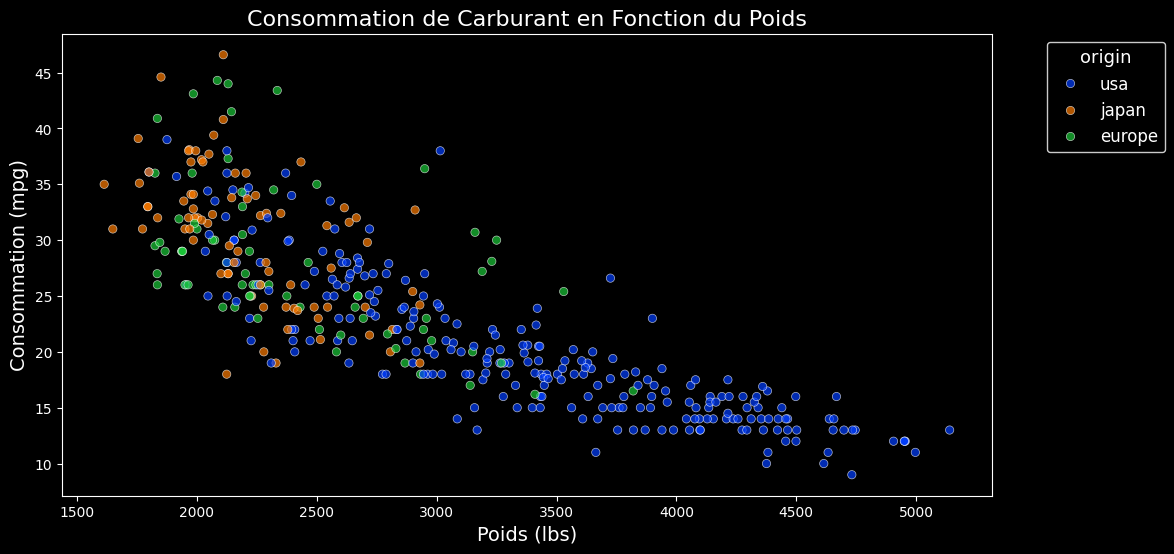

In [ ]:
# Appliquer un style avec fond noir
plt.style.use('dark_background')   #ORIGINE

# Définir la taille de la figure
plt.figure(figsize=(12, 6))

# Créer le graphique scatter plot
sns.scatterplot(x='weight', y='mpg', data=df, hue='origin', palette='bright', alpha=0.7)

# Ajouter des titres et des étiquettes aux axes
plt.title('Consommation de Carburant en Fonction du Poids', fontsize=16, color='white')
plt.xlabel('Poids (lbs)', fontsize=14, color='white')
plt.ylabel('Consommation (mpg)', fontsize=14, color='white')

# Configurer la légende pour qu'elle soit à l'extérieur du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='origin', title_fontsize='13', fontsize='12', facecolor='black', edgecolor='white')

# Afficher le graphique
plt.show()

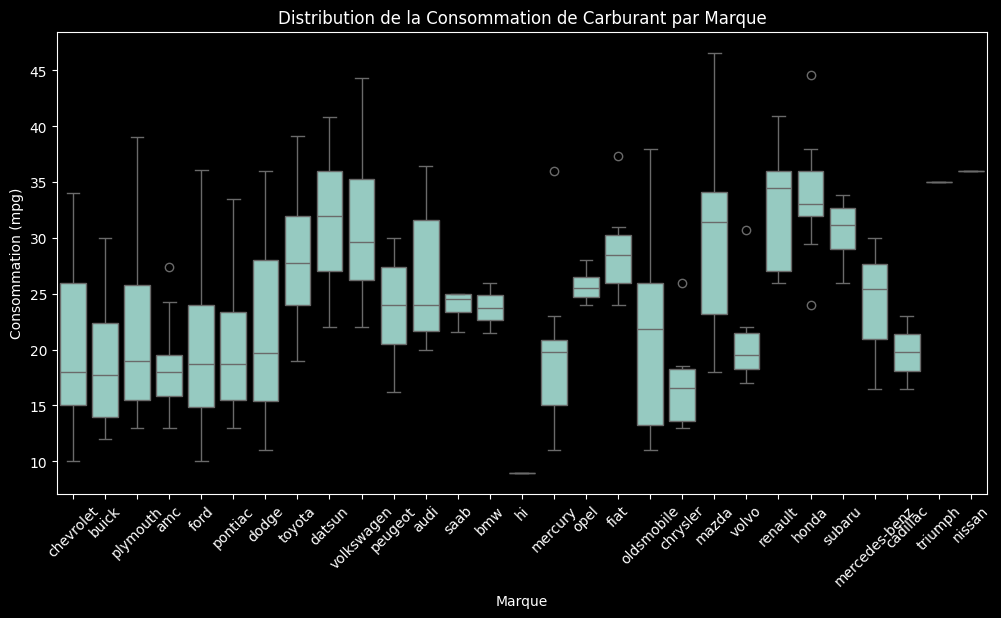

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Boxplot de la consommation de carburant par marque
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='mpg', data=df_clean)
plt.xticks(rotation=45)
plt.title('Distribution de la Consommation de Carburant par Marque')
plt.xlabel('Marque')
plt.ylabel('Consommation (mpg)')
plt.show()

<ipython-input-155-5a0e800eef94>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-155-5a0e800eef94>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



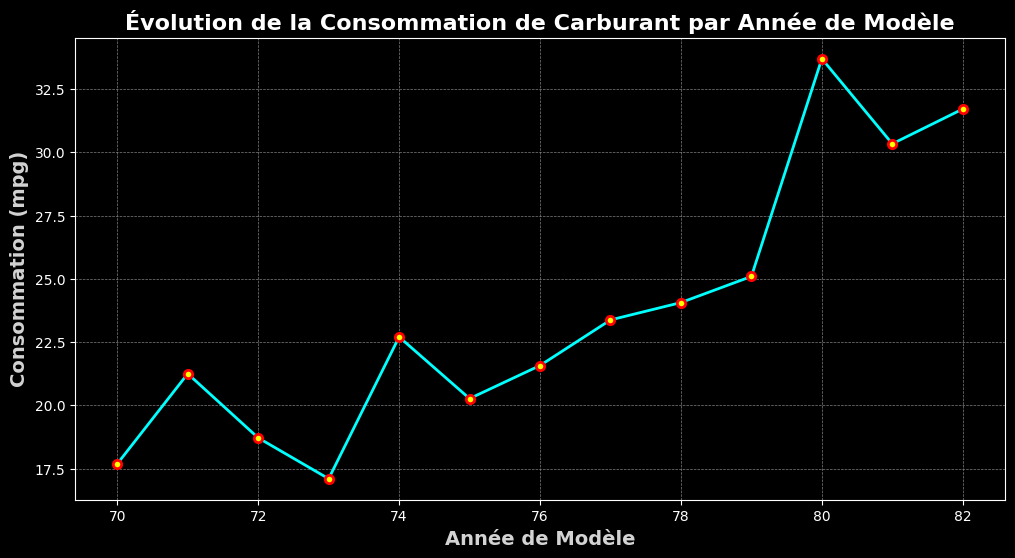

In [ ]:
# Style général du graphique
plt.style.use('dark_background')

# Créer la figure
plt.figure(figsize=(12, 6))

# Tracer le graphique en ligne
sns.lineplot(
    x='model_year', y='mpg', data=df_clean,
    ci=None, marker='o', linestyle='-',
    color='cyan', markerfacecolor='yellow',
    markeredgewidth=2, markeredgecolor='red',
    linewidth=2, palette='coolwarm'
)

# Ajouter un titre et des étiquettes
plt.title('Évolution de la Consommation de Carburant par Année de Modèle', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Année de Modèle', fontsize=14, fontweight='bold', color='lightgray')
plt.ylabel('Consommation (mpg)', fontsize=14, fontweight='bold', color='lightgray')

# Personnaliser la grille
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Ajouter des annotations (exemple)
plt.annotate('Point le plus bas', xy=(df['model_year'].min(), df['mpg'].min()), xytext=(df['model_year'].min()+1, df['mpg'].min()+5),
             arrowprops=dict(facecolor='yellow', shrink=0.05, width=2, headwidth=8),
             fontsize=12, color='white')

# Afficher le graphique
plt.show()

## **3. TOP 5 des Modèles les Moins Consommatrices avec les Meilleures Caractéristiques**

In [ ]:
# Trouver les 5 modèles les moins consommatrices
top_5_models = df_clean.nlargest(5, 'mpg')
top_5_models

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda
329,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan,honda
325,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe,volkswagen
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe,volkswagen


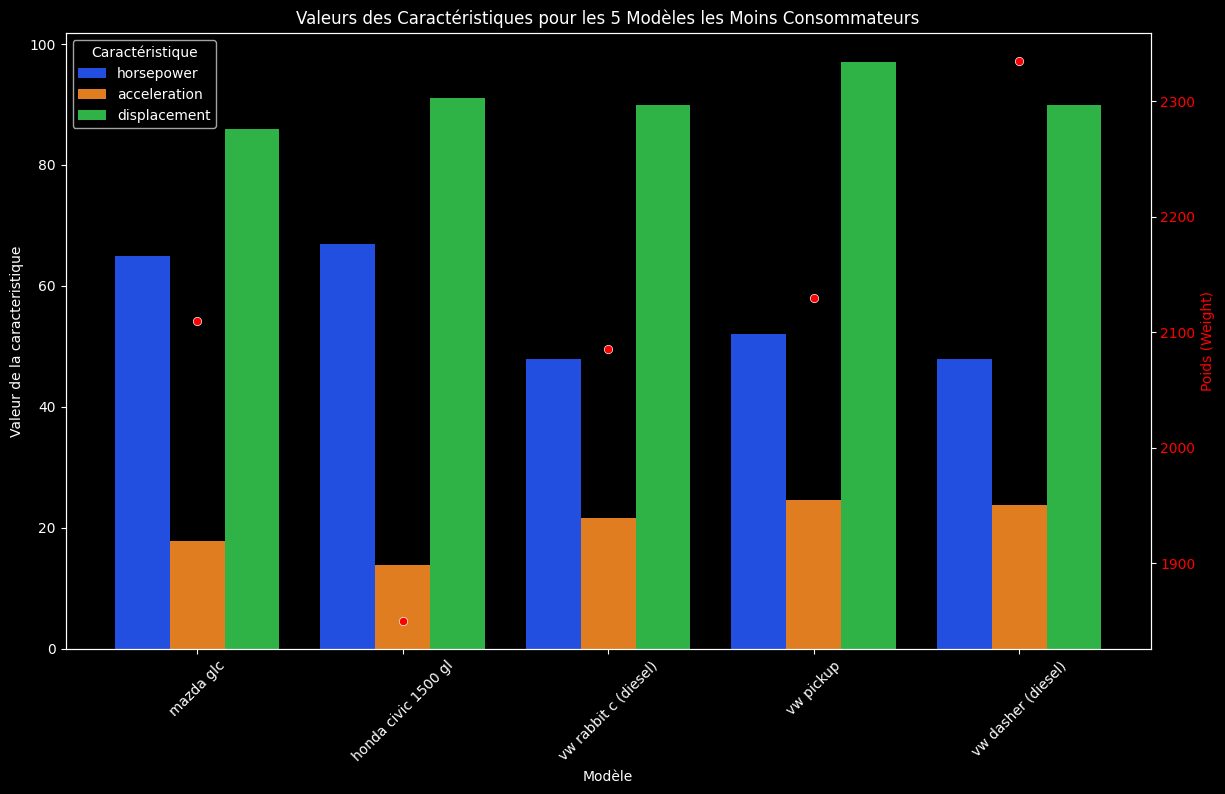

In [ ]:
features = ['horsepower', 'weight', 'acceleration', 'displacement']
top_5_models_melted = top_5_models.melt(id_vars='name', value_vars=features)

weight_data = top_5_models_melted[top_5_models_melted['variable'] == 'weight']
other_data = top_5_models_melted[top_5_models_melted['variable'] != 'weight']

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x='name', y='value', hue='variable', data=other_data, palette='bright', ax=ax1)
ax1.set_title('Valeurs des Caractéristiques pour les 5 Modèles les Moins Consommateurs')
ax1.set_xlabel('Modèle')
ax1.set_ylabel('Valeur de la caracteristique')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Caractéristique', loc='upper left')

ax2 = ax1.twinx()
sns.scatterplot(x='name', y='value', data=weight_data, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Poids (Weight)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

<ipython-input-158-c0fdb330e0e9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




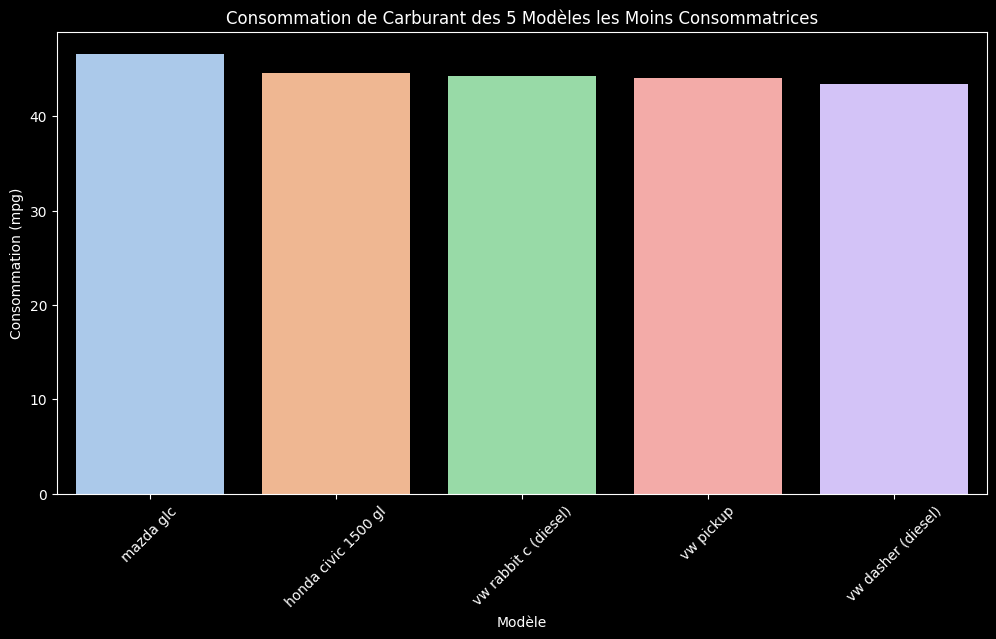

In [ ]:
# Créer le barplot pour la consommation de carburant
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='mpg', data=top_5_models, palette='pastel')
plt.title('Consommation de Carburant des 5 Modèles les Moins Consommatrices')
plt.xlabel('Modèle')
plt.ylabel('Consommation (mpg)')
plt.xticks(rotation=45)
plt.show()

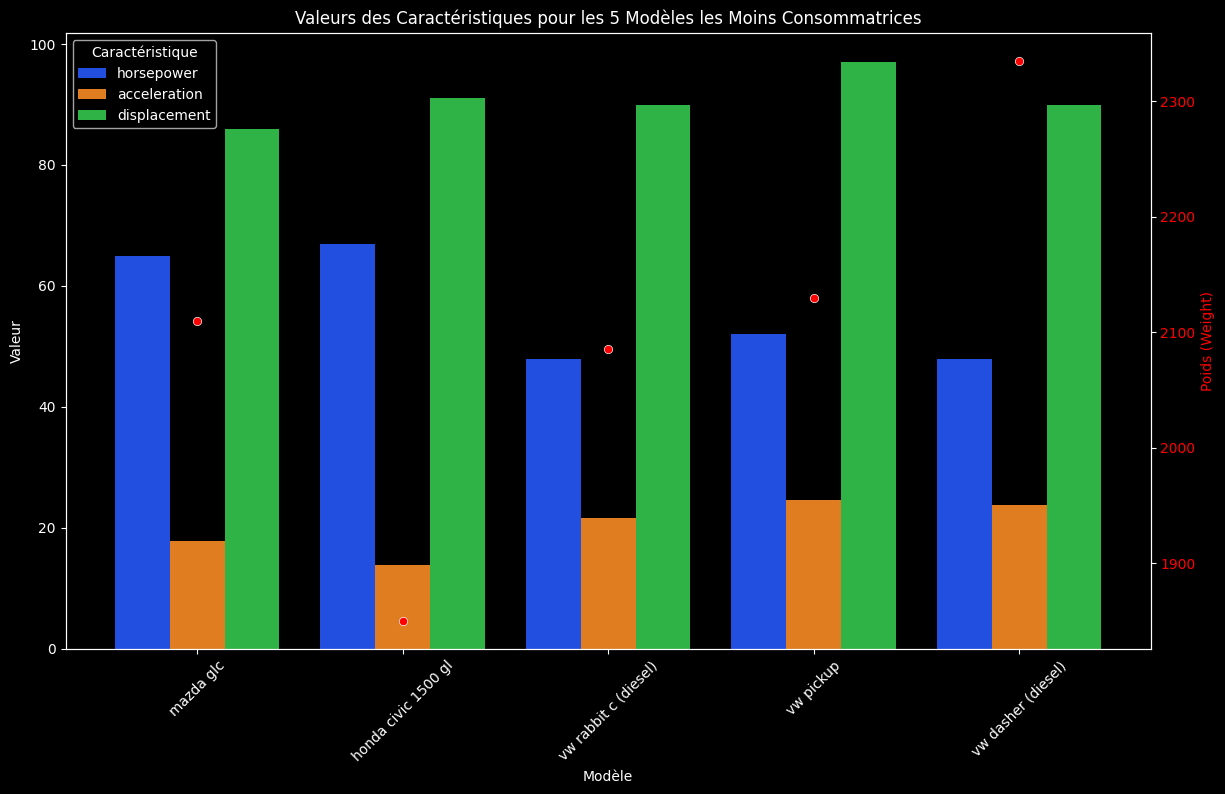

In [ ]:
features = ['horsepower', 'weight', 'acceleration', 'displacement']
top_5_models_melted = top_5_models.melt(id_vars='name', value_vars=features)

weight_data = top_5_models_melted[top_5_models_melted['variable'] == 'weight']
other_data = top_5_models_melted[top_5_models_melted['variable'] != 'weight']

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x='name', y='value', hue='variable', data=other_data, palette='bright', ax=ax1)
ax1.set_title('Valeurs des Caractéristiques pour les 5 Modèles les Moins Consommatrices')
ax1.set_xlabel('Modèle')
ax1.set_ylabel('Valeur')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Caractéristique', loc='upper left')

ax2 = ax1.twinx()
sns.scatterplot(x='name', y='value', data=weight_data, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Poids (Weight)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

<ipython-input-160-bde0d1f0c08f>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




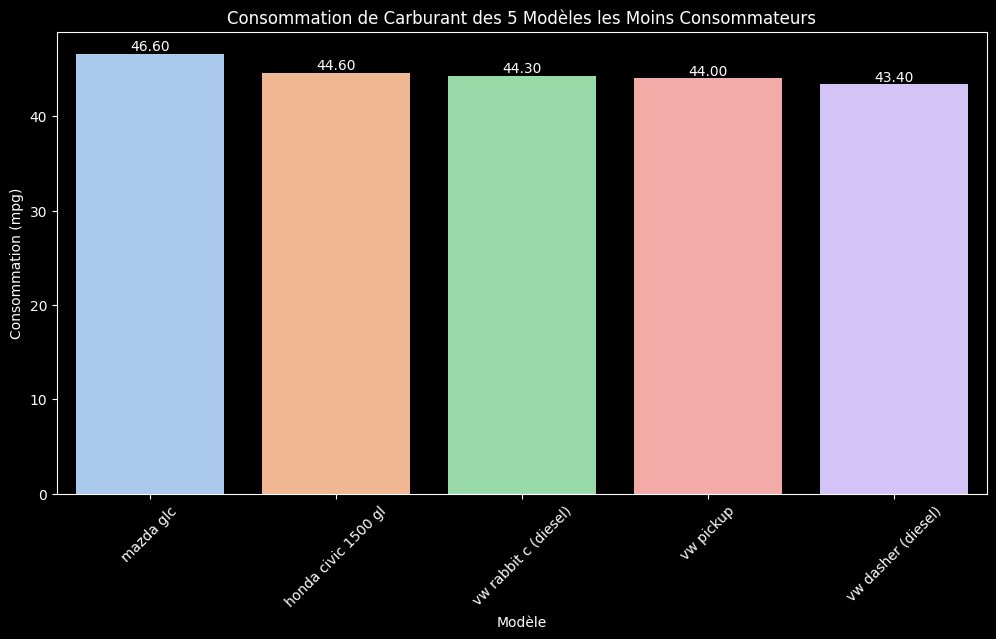

In [ ]:
# Trier le DataFrame pour obtenir les 5 modèles les moins consommateurs
top_5_models = df.sort_values(by='mpg', ascending=False).head(5)

# Style de fond sombre
plt.style.use('dark_background')

# Création de la figure
plt.figure(figsize=(12, 6))

# Création du barplot
ax = sns.barplot(x='name', y='mpg', data=top_5_models, palette='pastel')

# Titre et labels
plt.title('Consommation de Carburant des 5 Modèles les Moins Consommateurs')
plt.xlabel('Modèle')
plt.ylabel('Consommation (mpg)')
plt.xticks(rotation=45)

# Ajout des valeurs de consommation sur chaque barre
for p in ax.patches:
    width = p.get_height()  # La hauteur de la barre est la consommation (mpg)
    ax.annotate(f'{width:.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                color='white')

# Affichage du graphique
plt.show()

## **4. Région Produisant le Plus de Voitures les Moins Consommatrices**

<ipython-input-26-dfb8bf0d1e51>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




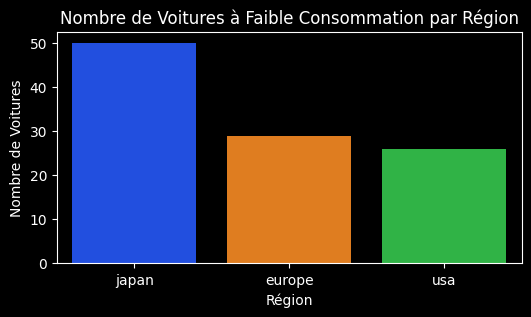

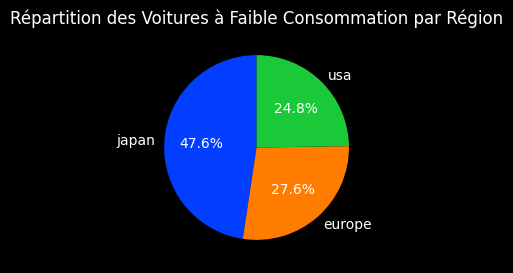

In [ ]:
# Calcul du nombre de voitures avec un mpg supérieur au 3ème quartile (soit mpg > 29 cf describe)
region_mpg = df_clean[df_clean['mpg'] >= df_clean['mpg'].quantile(0.75)].groupby('origin').size().sort_values(ascending=False)

plt.figure(figsize=(6, 3))
plt.style.use('dark_background')
sns.barplot(x=region_mpg.index, y=region_mpg.values, palette='bright')
plt.title('Nombre de Voitures à Faible Consommation par Région')
plt.xlabel('Région')
plt.ylabel('Nombre de Voitures')
plt.show()
print("")
# représentation graphique en camembert
# sns.set_style('dark')
plt.figure(figsize=(6,3))
plt.style.use('dark_background')
plt.pie(region_mpg.values, labels=region_mpg.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
plt.title('Répartition des Voitures à Faible Consommation par Région')
plt.show()

## **5. Meilleures Caractéristiques pour les Modèles**

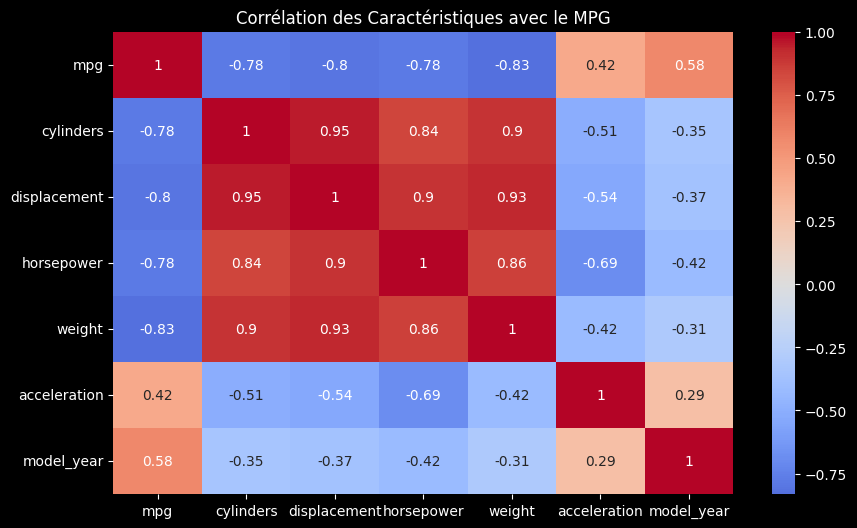

In [ ]:
# Heatmap des corrélations - variables numériques uniquement
plt.figure(figsize=(10, 6))
corr = df_clean[['mpg',	'cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'model_year']].corr()
# numeric_df = df_clean.select_dtypes(include=['number'])
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation des Caractéristiques avec le MPG')
plt.show()

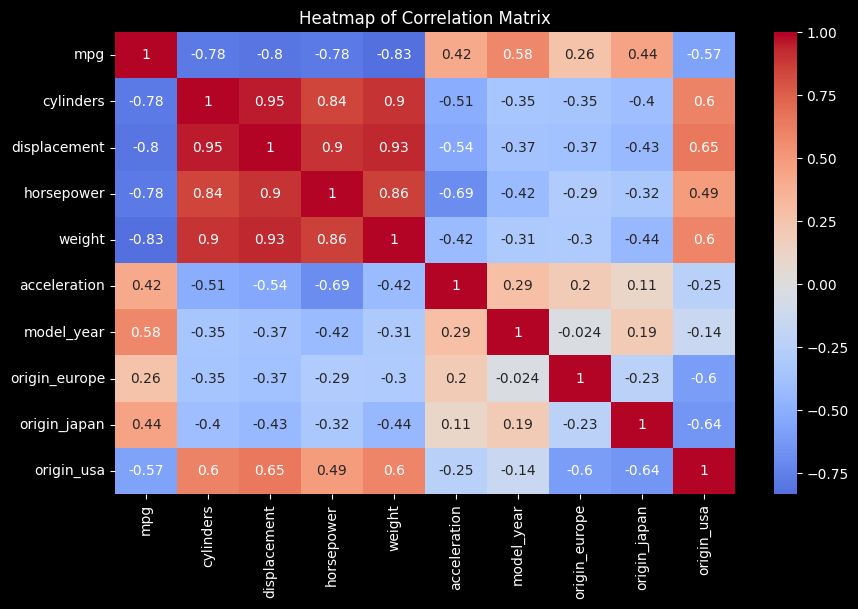

In [ ]:
# Heatmap des corrélations - yc variable catégorielle 'origin' encodée avec get_dummies
df_initial = df_clean.drop(columns=['brand']).copy()
# df_initial = df_clean.copy()
numeric_df = pd.get_dummies(df_initial.drop(columns=['name']))

plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# **Heatmap**

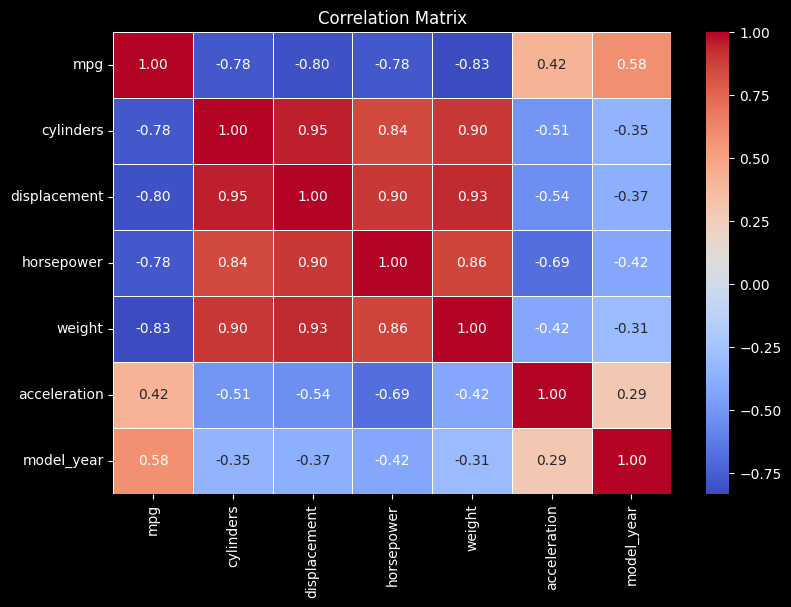

In [ ]:
# Exclude non-numeric columns
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#**Machine learning**

## **Modèle de régression linéaire multiple**

### **Simple**

In [ ]:
df_clean.head(3)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   brand         398 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# df_clean_copy = df_clean.copy()

In [ ]:
# Drop the "name" column
# cols_to_drop = ['name']
# data = df_clean.drop(columns=cols_to_drop)
data = df_clean.copy() # à ce stade on peut tout garder puisque dans on ne gardera par la suite que les variables numériques

In [ ]:
# Transform the "origin" column to represent the following:
# USA = 0, Japan = 1, Europe = 2

# Option 1 -  Encoder Instance definition
categ_to_encode = data['origin'].unique() # array
print(categ_to_encode)
ord_encoder = OrdinalEncoder(categories=[categ_to_encode]) # provide a list of array

# Option 1 -  Fit & Transform
ord_encoder.fit(data[["origin"]])
print(ord_encoder.categories_)
data["origin_encod"] = ord_encoder.transform(data[['origin']])

display(data.head(3))

['usa' 'japan' 'europe']
[array(['usa', 'japan', 'europe'], dtype=object)]


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,0.0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,0.0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,0.0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%

X = data.select_dtypes('number').drop(columns = 'mpg')
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [ ]:
# Create and fit the linear regression model
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = modelLR.predict(X_test)
y_pred

array([31.73891912, 29.56190063, 21.41219338, 16.91690875, 12.33276947,
       25.86879009, 27.88212245,  9.85386883, 16.69903092, 21.88103886,
       13.0269218 , 35.24295168, 24.93514162, 13.63977448, 23.7279873 ,
        6.03072996, 29.58206655, 25.22610111, 16.63800906, 35.3602626 ,
       24.9781655 , 18.78191724, 29.15871073, 28.78793255, 14.99378603,
       36.37947144, 26.924295  , 24.79402045, 22.01175024,  8.53326885,
       28.43535811, 36.79260326, 20.75939885, 24.70825021, 33.20200251,
       12.26540882, 22.99209381, 22.1616824 , 12.11697569, 28.22844358,
       26.51277433, 28.8760019 , 21.33956396,  7.08681271, 23.0877946 ,
       34.06377663, 28.25072407, 25.65891266, 23.78775705, 29.02617068,
       22.34138134, 32.607543  , 31.55012481, 10.97289245, 28.03844126,
        9.9178387 , 20.1066014 , 28.6674259 , 22.98470681, 20.32187006,
       16.48978086, 30.90736421, 23.7828284 , 21.55444284, 20.81236363,
       24.13840181, 24.92911446, 32.55568435, 27.92521617, 12.49

In [ ]:
# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')

Mean Squared Error (MSE): 8.88
Coefficient of Determination (R^2): 0.83


In [ ]:
# Analyze the coefficients of the linear regression model
coefficients = pd.Series(modelLR.coef_, index=X.columns).sort_values(ascending=False)
print('\nCoefficient Values:')
print(coefficients)


Coefficient Values:
origin_encod    1.479941
model_year      0.837845
acceleration    0.062904
displacement    0.016399
weight         -0.007247
horsepower     -0.010005
cylinders      -0.071226
dtype: float64


In [ ]:
# Print out the R2 score.
print(modelLR.score(X_train, y_train))
print(modelLR.score(X_test, y_test))

0.8162027316444822
0.8348892352763952


### **Optimisé**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create and fit the linear regression model
modelLR_optim = LinearRegression()

# Définir la grille des hyperparamètres à tester
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]
}

# Configurer GridSearchCV avec validation croisée (par défaut à 5)
grid_search = GridSearchCV(estimator=modelLR_optim, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

In [ ]:
# Entraîner GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir le meilleur modèle et les meilleurs hyperparamètres
best_modelLR = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [ ]:
# Prédire sur l'ensemble de test
y_pred = best_modelLR.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 8.877418644031177
R^2 Score: 0.8348892352763952


In [ ]:
# Print out the R2 score.
print(best_modelLR.score(X_train, y_train))
print(best_modelLR.score(X_test, y_test))

# pas vraiment optimisé car les paramètres par défaut étaient déjà les meilleurs

0.8162027316444822
0.8348892352763952


In [ ]:
### compilation des résultats des prédictions du jeu de test (X_test) dans un nvo dataframe pour faciliter dataviz et comparaison des modèles ===>
## concaténer X_test, y_test (colonne 'mpg'), modelLR.predict(X_test) (colonne 'mpg_pred_LR')

mpg = pd.DataFrame(y_test)
mpg.columns = ['mpg']
mpg.reset_index(drop=True, inplace=True)

mpg_pred_LR = pd.DataFrame(modelLR.predict(X_test))
mpg_pred_LR.columns = ['mpg_pred_LR']

df_viz = X_test.copy()
df_viz.reset_index(drop=False, inplace=True)
# mpg_pred_LR
df_viz = pd.concat([df_viz, mpg, mpg_pred_LR], axis=1)
df_viz


,index,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encod,mpg,mpg_pred_LR
0,198,4,91.0,53.0,1795,17.4,76,1.0,33.0,31.738919
1,396,4,120.0,79.0,2625,18.6,82,0.0,28.0,29.561901
2,33,6,232.0,100.0,2634,13.0,71,0.0,19.0,21.412193
3,208,8,318.0,150.0,3940,13.2,76,0.0,13.0,16.916909
4,93,8,318.0,150.0,4237,14.5,73,0.0,14.0,12.332769
...,...,...,...,...,...,...,...,...,...,...
75,249,8,260.0,110.0,3365,15.5,78,0.0,19.9,22.353423
76,225,6,250.0,110.0,3520,16.4,77,0.0,17.5,20.427363
77,367,4,112.0,88.0,2605,19.6,82,0.0,28.0,29.548515
78,175,4,90.0,70.0,1937,14.0,75,2.0,29.0,30.951576


## **Modèle Decision Tree Regressor**

### **Simple**

In [ ]:
df_clean.head(3)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth


In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drop the "name" column
cols_to_drop = ['name']
data = df_clean.drop(columns=cols_to_drop)

In [ ]:
# Transform the "origin" column to represent the following:
# USA = 0, Japan = 1, Europe = 2

# Option 1 -  Encoder Instance definition
categ_to_encode = data['origin'].unique() # array
print(categ_to_encode)
ord_encoder = OrdinalEncoder(categories=[categ_to_encode]) # provide a list of array

# Option 1 -  Fit & Transform
ord_encoder.fit(data[["origin"]])
print(ord_encoder.categories_)
data["origin_encod"] = ord_encoder.transform(data[['origin']])

display(data.head(3))

['usa' 'japan' 'europe']
[array(['usa', 'japan', 'europe'], dtype=object)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,0.0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%

X = data.select_dtypes('number').drop(columns = 'mpg')
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [ ]:
# Fit a decision tree

modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict on the xtest set

modelDTR.predict(X_test)

array([36. , 26. , 21. , 13. , 17.5, 28. , 26.4, 12. , 20. , 19. , 15. ,
       32. , 31. , 17. , 26. , 11. , 26. , 18. , 15.5, 37. , 26. , 18. ,
       38. , 30. , 16. , 30. , 28. , 25.5, 17.5, 11. , 27. , 36. , 26.6,
       27.2, 37. , 14. , 20. , 17.5, 15. , 25. , 28.4, 32. , 19. , 11. ,
       27.5, 37. , 24. , 24. , 24. , 24. , 21. , 32. , 32.4, 11. , 26.6,
       14. , 16.5, 32.9, 25.5, 20. , 13. , 31. , 23. , 19. , 18. , 27.2,
       22. , 32.4, 21. , 14. , 34.2, 14. , 14. , 18. , 27. , 23.9, 18.5,
       31. , 29. , 17.6])

In [ ]:
# Print out the R2 score.
print(modelDTR.score(X_train, y_train))
print(modelDTR.score(X_test, y_test))

1.0
0.78480304455695


In [ ]:
# Print each feature with importance %
DF_impfeat = pd.DataFrame({"columns": X.columns,
                           "imp_features": modelDTR.feature_importances_})
DF_impfeat.sort_values("imp_features", ascending=False)

,columns,imp_features
1,displacement,0.602342
2,horsepower,0.175932
5,model_year,0.117282
3,weight,0.057550
4,acceleration,0.032744
0,cylinders,0.007487
6,origin_encod,0.006664


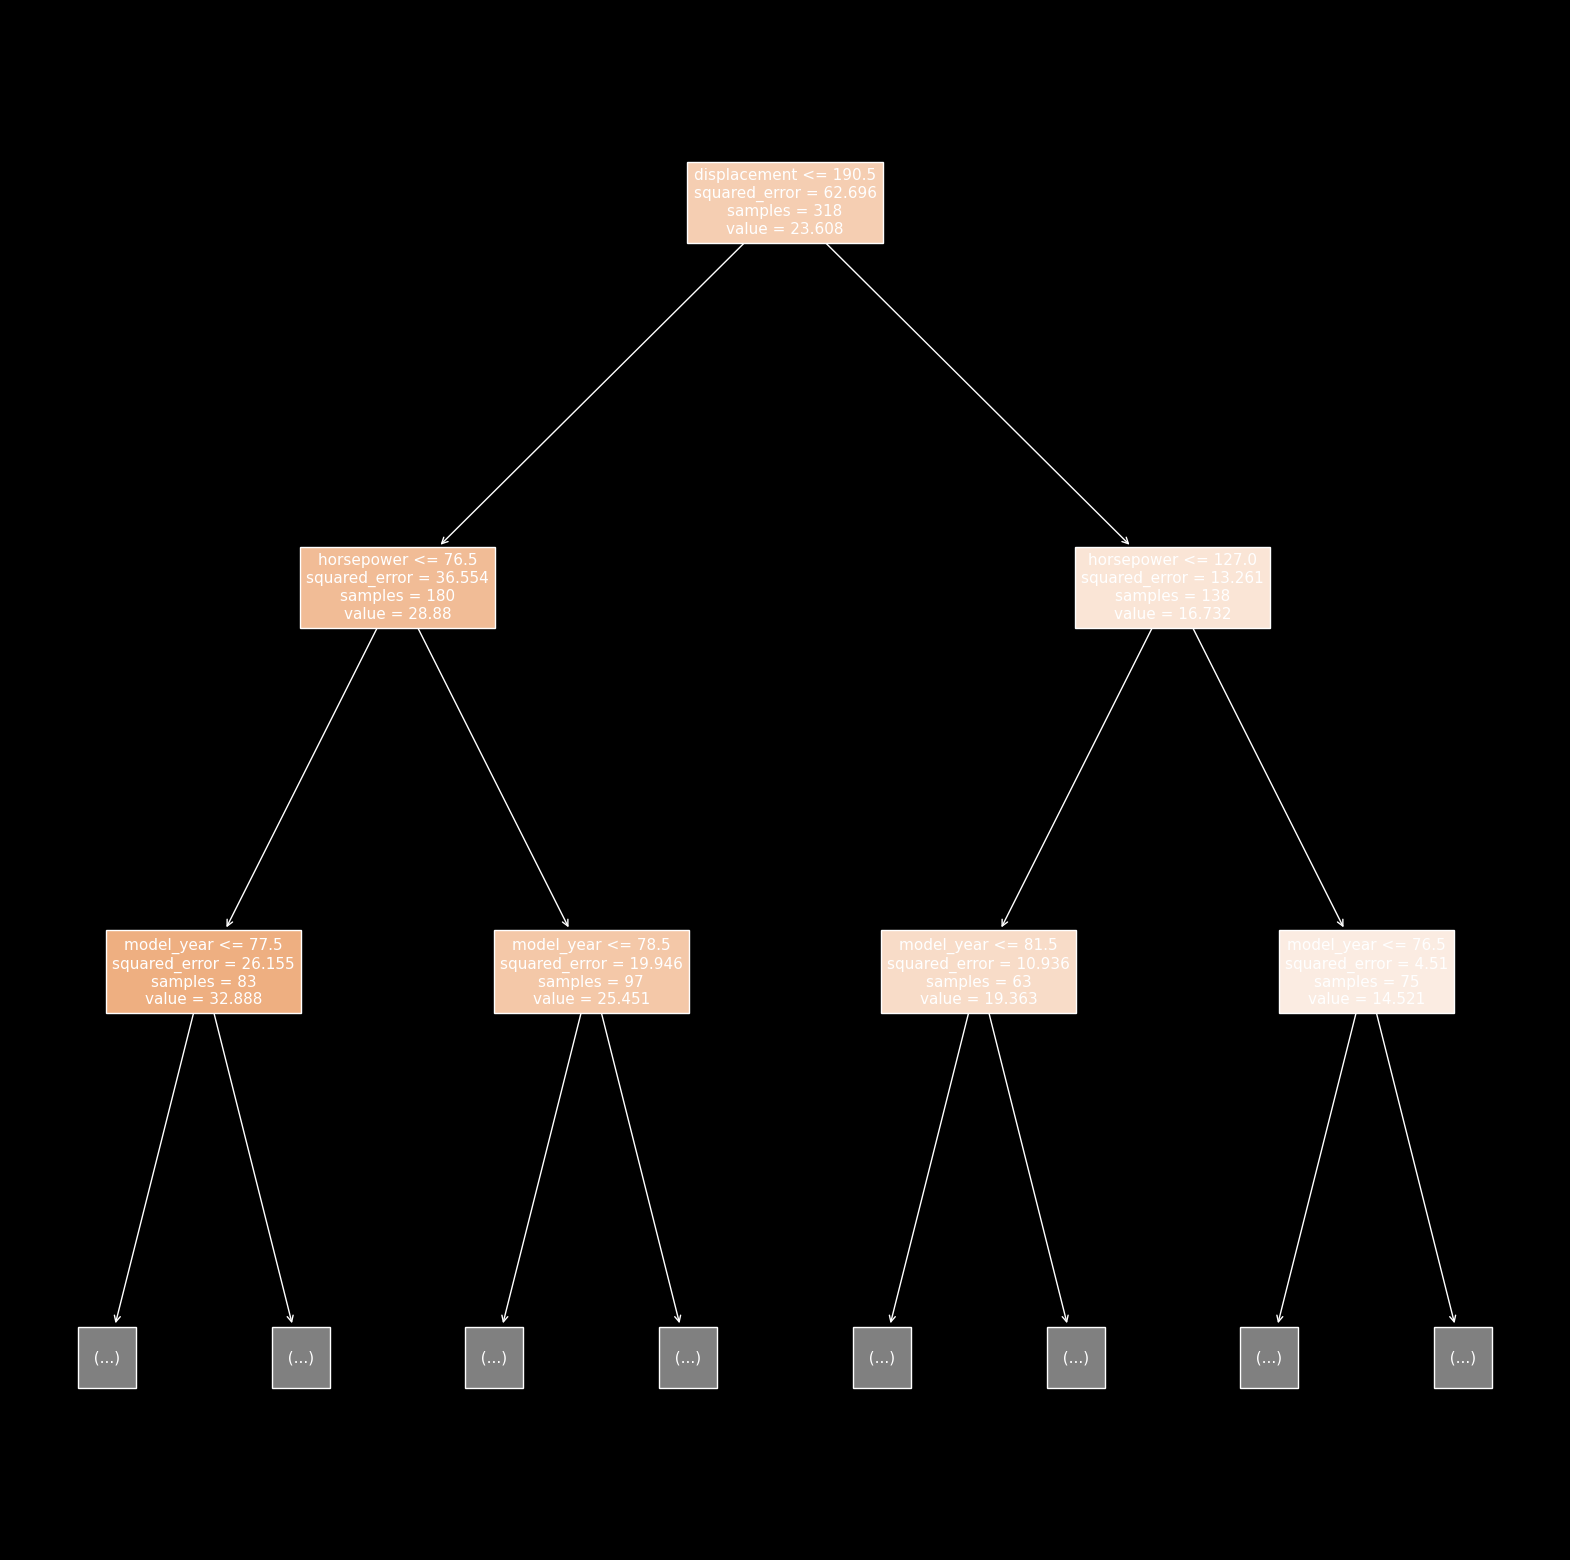

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

plt.figure(figsize = (20, 20))
tree.plot_tree(modelDTR, max_depth=2, filled=True,
               feature_names = X.columns)
plt.show()

### **Optimisé**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialiser le modèle DecisionTreeRegressor
modelDTR_optim = DecisionTreeRegressor(random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Configurer GridSearchCV avec validation croisée (par défaut à 5)
grid_search = GridSearchCV(estimator=modelDTR_optim , param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

In [ ]:
# Entraîner GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir le meilleur modèle et les meilleurs hyperparamètres
best_modelDTR = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Parameters: {'criterion': 'poisson', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


2160 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

In [ ]:
# Prédire sur l'ensemble de test
y_pred = best_modelDTR.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 5.81098256771979
R^2 Score: 0.8919217608153638


In [ ]:
# Print out the R2 score.
print(best_modelDTR.score(X_train, y_train))
print(best_modelDTR.score(X_test, y_test))

0.8984323141883661
0.8919217608153638


In [ ]:
## on complète le dataframe df_viz avec les nlles prédictions DTR => concaténation df_viz avec mpg_pred_DTR et mpg_pred_DTR_optim

# ajout colonne mpg_pred_DTR
mpg_pred_DTR = pd.DataFrame(modelDTR.predict(X_test))
mpg_pred_DTR.columns = ['mpg_pred_DTR']
df_viz = pd.concat([df_viz, mpg_pred_DTR], axis=1)

# ajout colonne mpg_pred_DTR_optim
mpg_pred_DTR_optim = pd.DataFrame(best_modelDTR.predict(X_test))
mpg_pred_DTR_optim.columns = ['mpg_pred_DTR_optim']
df_viz = pd.concat([df_viz, mpg_pred_DTR_optim], axis=1)
df_viz

,index,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encod,mpg,mpg_pred_LR,mpg_pred_DTR,mpg_pred_DTR_optim
0,198,4,91.0,53.0,1795,17.4,76,1.0,33.0,31.738919,36.0,31.541667
1,396,4,120.0,79.0,2625,18.6,82,0.0,28.0,29.561901,26.0,29.453333
2,33,6,232.0,100.0,2634,13.0,71,0.0,19.0,21.412193,21.0,19.400000
3,208,8,318.0,150.0,3940,13.2,76,0.0,13.0,16.916909,13.0,15.147059
4,93,8,318.0,150.0,4237,14.5,73,0.0,14.0,12.332769,17.5,15.147059
...,...,...,...,...,...,...,...,...,...,...,...,...
75,249,8,260.0,110.0,3365,15.5,78,0.0,19.9,22.353423,23.9,22.860000
76,225,6,250.0,110.0,3520,16.4,77,0.0,17.5,20.427363,18.5,19.154545
77,367,4,112.0,88.0,2605,19.6,82,0.0,28.0,29.548515,31.0,30.341667
78,175,4,90.0,70.0,1937,14.0,75,2.0,29.0,30.951576,29.0,29.227273


## **Modèle de KNeighbors Regressor**

### **Simple**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_clean.head(3)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth


In [ ]:
# Drop the "name" column
cols_to_drop = ['name']
data = df_clean.drop(columns=cols_to_drop)

In [ ]:
# Transform the "origin" column to represent the following:
# USA = 0, Japan = 1, Europe = 2

# Option 1 -  Encoder Instance definition
categ_to_encode = data['origin'].unique() # array
print(categ_to_encode)
ord_encoder = OrdinalEncoder(categories=[categ_to_encode]) # provide a list of array

# Option 1 -  Fit & Transform
ord_encoder.fit(data[["origin"]])
print(ord_encoder.categories_)
data["origin_encod"] = ord_encoder.transform(data[['origin']])

display(data.head(3))

['usa' 'japan' 'europe']
[array(['usa', 'japan', 'europe'], dtype=object)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,0.0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%

X = data.select_dtypes('number').drop(columns = 'mpg')
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)


In [ ]:
scaler = StandardScaler()


# Fit only on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)
X_scaler = scaler.transform(X)


In [ ]:
# Instantiate the model with the number of neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predict on the test data
y_pred = knn.predict(X_test)
y_pred

array([32.52, 29.08, 18.8 , 15.9 , 14.6 , 25.4 , 27.52, 12.6 , 17.46,
       19.  , 14.4 , 34.76, 22.  , 15.  , 22.2 , 12.8 , 28.96, 19.22,
       15.6 , 35.8 , 25.6 , 19.2 , 24.54, 29.38, 16.4 , 37.6 , 24.  ,
       25.44, 20.64, 12.6 , 26.92, 34.62, 18.9 , 25.4 , 38.52, 13.  ,
       18.6 , 17.54, 14.4 , 26.  , 25.94, 27.4 , 21.6 , 11.6 , 25.6 ,
       34.32, 24.6 , 22.1 , 25.8 , 26.6 , 22.  , 35.3 , 35.28, 13.  ,
       25.56, 13.4 , 16.88, 29.42, 23.8 , 19.8 , 14.  , 31.9 , 25.1 ,
       24.6 , 18.6 , 23.  , 25.66, 35.92, 26.98, 14.6 , 34.16, 14.2 ,
       13.4 , 18.  , 23.76, 17.6 , 19.62, 28.4 , 26.8 , 17.6 ])

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.1006149999999995
R-squared: 0.9051338596296877


In [ ]:
# Print out the R2 score.
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8975392714756478
0.9051338596296877


### **Optimisé**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialiser le modèle KNeighborsRegressor
knn_optim = KNeighborsRegressor()

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],        # Nombre de voisins
    'weights': ['uniform', 'distance'],     # Poids appliqués aux voisins
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithme pour trouver les voisins
    'p': [1, 2]                             # Paramètre de la distance de Minkowski (p=1 pour Manhattan, p=2 pour Euclidienne)
}

# Configurer GridSearchCV avec validation croisée (par défaut à 5)
grid_search = GridSearchCV(estimator=knn_optim, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

In [ ]:
# Entraîner GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir le meilleur modèle et les meilleurs hyperparamètres
best_modelKNN = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [ ]:
# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, best_modelKNN.predict(X_test)) ## mc: car j'ai l'impression que y_pred fait appel à celui du modèle non optimisé
r2 = r2_score(y_test, best_modelKNN.predict(X_test))

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.708475902914762
R-squared: 0.9124272394728588


In [ ]:
# Print out the R2 score.
print(best_modelKNN.score(X_train, y_train))
print(best_modelKNN.score(X_test, y_test))

1.0
0.9124272394728588


In [ ]:
## on complète le dataframe df_viz avec les nlles prédictions KNN => concaténation df_viz avec mpg_pred_KNN et mpg_pred_KNN_optim

# ajout colonne mpg_pred_KNN
mpg_pred_KNN = pd.DataFrame(knn.predict(X_test))
mpg_pred_KNN.columns = ['mpg_pred_KNN']
df_viz = pd.concat([df_viz, mpg_pred_KNN], axis=1)

# ajout colonne mpg_pred_KNN_optim
mpg_pred_KNN_optim = pd.DataFrame(best_modelKNN.predict(X_test))
mpg_pred_KNN_optim.columns = ['mpg_pred_KNN_optim']
df_viz = pd.concat([df_viz, mpg_pred_KNN_optim], axis=1)
df_viz

,index,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encod,mpg,mpg_pred_LR,mpg_pred_DTR,mpg_pred_DTR_optim,mpg_pred_KNN,mpg_pred_KNN_optim
0,198,4,91.0,53.0,1795,17.4,76,1.0,33.0,31.738919,36.0,31.541667,32.52,31.909993
1,396,4,120.0,79.0,2625,18.6,82,0.0,28.0,29.561901,26.0,29.453333,29.08,28.897261
2,33,6,232.0,100.0,2634,13.0,71,0.0,19.0,21.412193,21.0,19.400000,18.80,18.461631
3,208,8,318.0,150.0,3940,13.2,76,0.0,13.0,16.916909,13.0,15.147059,15.90,15.274088
4,93,8,318.0,150.0,4237,14.5,73,0.0,14.0,12.332769,17.5,15.147059,14.60,14.408895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,249,8,260.0,110.0,3365,15.5,78,0.0,19.9,22.353423,23.9,22.860000,17.60,19.158559
76,225,6,250.0,110.0,3520,16.4,77,0.0,17.5,20.427363,18.5,19.154545,19.62,19.562210
77,367,4,112.0,88.0,2605,19.6,82,0.0,28.0,29.548515,31.0,30.341667,28.40,28.448707
78,175,4,90.0,70.0,1937,14.0,75,2.0,29.0,30.951576,29.0,29.227273,26.80,28.170913


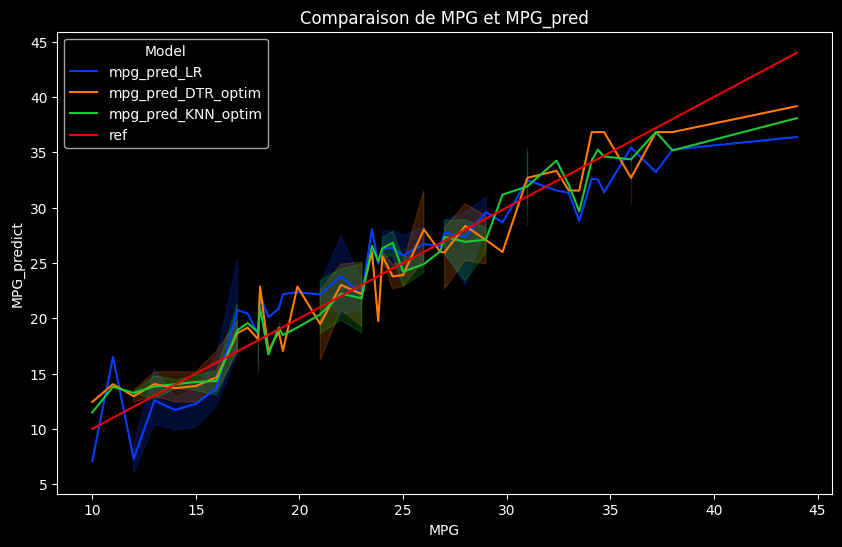

In [ ]:
## Visualisation des prédictions versus mpg ref => lineplot mpg en axe x et mpg_pred en y
sns.set_palette("bright")
plt.figure(figsize=(10, 6))
sns.lineplot(x='mpg', y='mpg_pred_LR', data=df_viz, label='mpg_pred_LR')
# sns.lineplot(x='mpg', y='mpg_pred_DTR', data=df_viz, label='mpg_pred_DTR') ## moins bon fit que la version optim
sns.lineplot(x='mpg', y='mpg_pred_DTR_optim', data=df_viz, label='mpg_pred_DTR_optim')
# sns.lineplot(x='mpg', y='mpg_pred_KNN', data=df_viz, label='mpg_pred_KNN')
sns.lineplot(x='mpg', y='mpg_pred_KNN_optim', data=df_viz, label='mpg_pred_KNN_optim') ## très légère amélioration par rapport à la version non optim
sns.lineplot(x='mpg', y='mpg', data=df_viz, label='ref')
plt.title('Comparaison de MPG et MPG_pred')
plt.xlabel('MPG')
plt.ylabel('MPG_predict')
plt.legend(title='Model')
plt.show()

# Estimation suite à prédiction

## Prédictions futures sur des données réelles plus récentes

In [ ]:
## On considères 3 modèles de véhicule représentatif du jeu de donnée de départ mais présents sur le marché actuel ===>
## Peugeot 208 / Toyota Corolla / Ford Explorer
#     rappel données encodées 0 = usa / 1 = japon / 2 = europe)
#    'brand': ['Peugeot', 'Toyota', 'Ford'],  # Marques de véhicules
#    'model': ['208', 'Corolla', 'Explorer'],  # Modèles de véhicules
#    'mpg': [45, 32, 20],  # Consommation en miles per gallon (MPG)
#    'origin': ['europe', 'japan', 'usa']

## df rassemblant les critères utilisés pour exécution des modèles de prédiction ===>
df_test = pd.DataFrame({
    'cylinders': [3, 4, 6],  # Nombre de cylindres
    'displacement': [120, 150, 250],  # Volume du moteur en cm
    'horsepower': [82, 132, 300],  # Puissance en chevaux (HP)
    'weight': [980, 1250, 1850],  # Poids en kg (léger, moyen, lourd)
    'acceleration': [11, 8.0, 6.0],  # Temps d'accélération 0-100 km/h (en secondes)
    'model_year': [99, 99, 99],  # Année de fabrication 2022 en principe mais 99 car 22 risque de fausser le modèle (données de départ [70-82])
    'origin_encod': [2, 1, 0]  # Pays d'origine
})

In [ ]:
## df intermédiaire utilisé uniquement pour la représentation graphique
# ==> ajout colonnes brand, model, mpg et supp colonnes model_year et origin_encod

df_restit = pd.DataFrame({
    'brand': ['Peugeot', 'Toyota', 'Ford'],  # Marques de véhicules
    'model': ['208', 'Corolla', 'Explorer'],  # Modèles de véhicules
    'mpg': [45, 32, 20],  # Consommation en miles per gallon (MPG)
    'cylinders': [3, 4, 6],  # Nombre de cylindres
    'displacement': [120, 150, 250],  # Volume du moteur en cm
    'horsepower': [82, 132, 300],  # Puissance en chevaux (HP)
    'weight': [980, 1250, 1700],  # Poids en kg (léger, moyen, lourd)
    'acceleration': [11, 8.0, 6],  # Temps d'accélération 0-100 km/h (en secondes)

})

In [ ]:
# Prédiction de la consommation -- model LR

future_mpg_predictions = modelLR.predict(df_test)
print("Prédictions de consommation future - model LR:", future_mpg_predictions)

## on ajoute la prédiction au df_restit
future_mpg_predictions = pd.DataFrame(future_mpg_predictions)
future_mpg_predictions.columns = ['mpg_pred_LR']
df_restit = pd.concat([df_restit, future_mpg_predictions], axis=1)
display(df_restit)

Prédictions de consommation future - model LR: [58.24971762 54.54484252 48.40743753]


,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg_pred_LR
0,Peugeot,208,45,3,120,82,980,11.0,58.249718
1,Toyota,Corolla,32,4,150,132,1250,8.0,54.544843
2,Ford,Explorer,20,6,250,300,1700,6.0,48.407438


In [ ]:
#Prédiction de la consommation -- model DTR non optimisé

future_mpg_predictions = modelDTR.predict(df_test)
print("Prédictions de consommation future - model DTR non optim:", future_mpg_predictions)

## on ajoute la prédiction au df_restit
future_mpg_predictions = pd.DataFrame(future_mpg_predictions)
future_mpg_predictions.columns = ['mpg_pred_DTR_non_optim']
df_restit = pd.concat([df_restit, future_mpg_predictions], axis=1)
display(df_restit)

Prédictions de consommation future - model DTR non optim: [23.7 32.  17.7]


,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg_pred_LR,mpg_pred_DTR_non_optim
0,Peugeot,208,45,3,120,82,980,11.0,58.249718,23.7
1,Toyota,Corolla,32,4,150,132,1250,8.0,54.544843,32.0
2,Ford,Explorer,20,6,250,300,1700,6.0,48.407438,17.7


In [ ]:
#Prédiction de la consommation -- model DTR optimisé

future_mpg_predictions = best_modelDTR.predict(df_test)
print("Prédictions de consommation future - model DTR optim:", future_mpg_predictions)

## on ajoute la prédiction au df_restit
future_mpg_predictions = pd.DataFrame(future_mpg_predictions)
future_mpg_predictions.columns = ['mpg_pred_DTR_optim']
df_restit = pd.concat([df_restit, future_mpg_predictions], axis=1)
display(df_restit)

Prédictions de consommation future - model DTR optim: [35.04166667 30.34166667 17.0375    ]


,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg_pred_LR,mpg_pred_DTR_non_optim,mpg_pred_DTR_optim
0,Peugeot,208,45,3,120,82,980,11.0,58.249718,23.7,35.041667
1,Toyota,Corolla,32,4,150,132,1250,8.0,54.544843,32.0,30.341667
2,Ford,Explorer,20,6,250,300,1700,6.0,48.407438,17.7,17.037500


In [ ]:
#Prédiction de la consommation -- model KNN non optimisé

# on scalerise les features pour être alignés avec le modèle de prédiction knn
df_test_scaler = scaler.transform(df_test)

future_mpg_predictions = knn.predict(df_test_scaler)
print("Prédictions de consommation future - model KNN non optimisé:", future_mpg_predictions)

## on ajoute la prédiction au df_restit
future_mpg_predictions = pd.DataFrame(future_mpg_predictions)
future_mpg_predictions.columns = ['mpg_pred_KNR_non_optim']
df_restit = pd.concat([df_restit, future_mpg_predictions], axis=1)
display(df_restit)

Prédictions de consommation future - model KNN non optimisé: [34.2  32.4  24.54]


,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg_pred_LR,mpg_pred_DTR_non_optim,mpg_pred_DTR_optim,mpg_pred_KNR_non_optim
0,Peugeot,208,45,3,120,82,980,11.0,58.249718,23.7,35.041667,34.20
1,Toyota,Corolla,32,4,150,132,1250,8.0,54.544843,32.0,30.341667,32.40
2,Ford,Explorer,20,6,250,300,1700,6.0,48.407438,17.7,17.037500,24.54


In [ ]:
#Prédiction de la consommation -- model KNN optimisé
future_mpg_predictions = best_modelKNN.predict(df_test_scaler)
print("Prédictions de consommation future - model KNN optimisé:", future_mpg_predictions)

## on ajoute la prédiction au df_restit
future_mpg_predictions = pd.DataFrame(future_mpg_predictions)
future_mpg_predictions.columns = ['mpg_pred_KNR_optim']
df_restit = pd.concat([df_restit, future_mpg_predictions], axis=1)
display(df_restit)

Prédictions de consommation future - model KNN optimisé: [33.60016476 34.77423909 25.28327372]


,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg_pred_LR,mpg_pred_DTR_non_optim,mpg_pred_DTR_optim,mpg_pred_KNR_non_optim,mpg_pred_KNR_optim
0,Peugeot,208,45,3,120,82,980,11.0,58.249718,23.7,35.041667,34.20,33.600165
1,Toyota,Corolla,32,4,150,132,1250,8.0,54.544843,32.0,30.341667,32.40,34.774239
2,Ford,Explorer,20,6,250,300,1700,6.0,48.407438,17.7,17.037500,24.54,25.283274


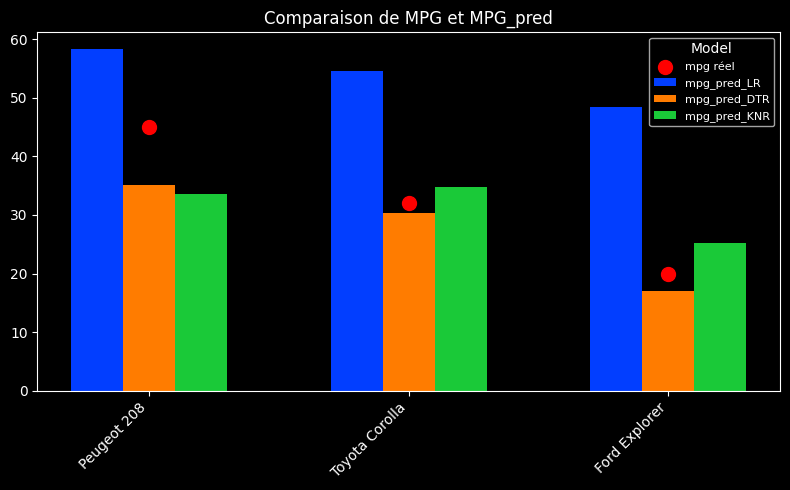

In [ ]:
## représentation graphique des résultats pour comparaison des prédictions :

# Ajuster la palette pour des couleurs contrastées
sns.set_palette("bright")

plt.figure(figsize=(8, 5))

# Positions pour chaque bloc de barres (pour éviter l'empilement)
x = np.arange(len(df_restit['model']))

# Largeur des barres
width = 0.2

# Tracer les barres pour chaque modèle de prédiction avec décalage
plt.bar(x - width, df_restit['mpg_pred_LR'], width=width, label='mpg_pred_LR')
plt.bar(x, df_restit['mpg_pred_DTR_optim'], width=width, label='mpg_pred_DTR')
plt.bar(x + width, df_restit['mpg_pred_KNR_optim'], width=width, label='mpg_pred_KNR')

# Tracer les points rouges pour le mpg réel
plt.scatter(x, df_restit['mpg'], color='red', label='mpg réel', zorder=5, s=100)

# Combiner la marque et le modèle pour les étiquettes de l'axe des abscisses
labels = df_restit['brand'] + ' ' + df_restit['model']

# Ajouter les labels combinés pour les modèles sur l'axe des x
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')

# Ajouter le titre et les labels des axes
plt.title('Comparaison de MPG et MPG_pred')
#plt.xlabel('Modèle (Marque)')
#plt.ylabel('MPG')

# Afficher la légende avec une taille réduite
plt.legend(title='Model', prop={'size': 8})  # Réduire la taille de la légende avec prop={'size': 10}

# Ajuster la disposition
plt.tight_layout()

# Afficher le graphique
plt.show()

## Prédiction unitaire

In [ ]:
# #Prédiction de la consommation pour les années futures (exemple)
# future_years = pd.DataFrame({'cylinders': [4, 6], 'displacement': [120, 250], 'horsepower': [100, 150],
#                              'weight': [2500, 3500], 'acceleration': [15, 12], 'model_year': [83, 90],
#                              'origin_encod' : [0.0,1.0]})
# future_mpg_predictions = modelLR.predict(future_years)
# print("Prédictions de consommation future:", future_mpg_predictions)

In [ ]:
# #Prédiction de la consommation pour les années futures (exemple)
# future_years = pd.DataFrame({'cylinders': [4, 6], 'displacement': [120, 250], 'horsepower': [100, 150],
#                              'weight': [2500, 3500], 'acceleration': [15, 12], 'model_year': [83, 90],
#                              'origin_encod' : [0.0,1.0]})
# future_mpg_predictions = modelDTR.predict(future_years)
# print("Prédictions de consommation future:", future_mpg_predictions)

In [ ]:
# #Prédiction de la consommation pour les années futures (exemple)
# future_years = pd.DataFrame({'cylinders': [4, 6], 'displacement': [120, 250], 'horsepower': [100, 150],
#                              'weight': [2500, 3500], 'acceleration': [15, 12], 'model_year': [83, 90],
#                              'origin_encod' : [0.0,1.0]})

# future_mpg_predictions = knn.predict(future_years)
# print("Prédictions de consommation future:", future_mpg_predictions)

## Prédiction sur l'ensemble du dataset

In [ ]:
data

In [ ]:
df_clean_copy = data.copy()

### Simple

#### Ajout prédiction modèle regression linéaire multiple

In [ ]:
df_clean_copy['pred_mpg_LR'] = modelLR.predict(data.select_dtypes('number').drop(columns = 'mpg'))

In [ ]:
df_clean_copy

In [ ]:
df_clean_copy.loc[df_clean_copy['mpg']>40]

#### Ajout prédiction modèle Decison Tree Regressor

In [ ]:
df_clean_copy['pred_mpg_DTR'] = modelDTR.predict(data.select_dtypes('number').drop(columns = 'mpg'))
df_clean_copy

In [ ]:
df_clean_copy.loc[df_clean_copy['mpg']>40]

#### Ajout prédiction modèle KNN Regressor

In [ ]:
df_clean_copy['pred_mpg_KNN'] = knn.predict(X_scaler)
df_clean_copy

In [ ]:
df_clean_copy.loc[df_clean_copy['mpg']>40]

#### Représentation graphique

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mpg', y='pred_mpg_LR', data=df_clean_copy, label='Model LR')
sns.lineplot(x='mpg', y='pred_mpg_KNN', data=df_clean_copy, label='Model KNN')
sns.lineplot(x='mpg', y='pred_mpg_DTR', data=df_clean_copy, label='Model DTR')
sns.lineplot(x='mpg', y='mpg', data=df_clean_copy, label='Ref')
plt.title('Comparaison de MPG et MPG_pred')
plt.xlabel('MPG')
plt.ylabel('MPG_predict')
plt.legend()
plt.show()

### Optimisé

#### Ajout prédiction optimisée Decision Tree Regressor

In [ ]:
df_clean_copy['pred_optim_mpg_DTR'] = best_modelDTR.predict(data.select_dtypes('number').drop(columns = 'mpg'))

In [ ]:
df_clean_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod,pred_mpg_LR,pred_mpg_DTR,pred_mpg_KNN,pred_optim_mpg_DTR
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,0.0,14.993786,16.0,16.40,15.147059
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,0.0,13.947605,15.0,16.00,14.035714
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,0.0,15.403969,18.0,16.60,15.147059
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,0.0,15.259035,16.0,16.60,15.147059
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,0.0,15.115977,17.0,16.60,15.147059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,0.0,28.435358,27.0,26.92,25.983333
394,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen,2.0,36.379471,30.0,37.60,39.170000
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,0.0,31.709056,32.0,33.14,33.323077
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,0.0,29.561901,25.8,29.08,29.453333


In [ ]:
df_clean_copy.loc[df_clean_copy['mpg']>40]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod,pred_mpg_LR,pred_mpg_DTR,pred_mpg_KNN,pred_optim_mpg_DTR
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen,2.0,33.809141,43.1,38.56,39.170000
309,41.5,4,98.0,76.0,2144,14.7,80,europe,volkswagen,2.0,33.755852,41.5,35.60,35.041667
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda,1.0,32.636876,46.6,37.70,39.170000
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun,1.0,32.702253,40.8,36.30,39.170000
325,44.3,4,90.0,48.0,2085,21.7,80,europe,volkswagen,2.0,34.772706,44.3,40.64,39.170000
326,43.4,4,90.0,48.0,2335,23.7,80,europe,volkswagen,2.0,33.086748,43.4,37.60,39.170000
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda,1.0,34.325189,44.6,36.12,36.823077
330,40.9,4,85.0,67.0,1835,17.3,80,europe,renault,2.0,36.035609,40.9,35.10,36.823077
394,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen,2.0,36.379471,30.0,37.60,39.170000


#### Ajout prédiction optimisée KNN Regressor

In [ ]:
df_clean_copy['pred_optim_mpg_KNN'] = best_modelKNN.predict(X_scaler)
df_clean_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod,pred_mpg_LR,pred_mpg_DTR,pred_mpg_KNN,pred_optim_mpg_DTR,pred_optim_mpg_KNN
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,0.0,14.993786,16.0,16.40,15.147059,15.974265
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,0.0,13.947605,15.0,16.00,14.035714,15.302541
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,0.0,15.403969,18.0,16.60,15.147059,16.714877
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,0.0,15.259035,16.0,16.60,15.147059,16.203112
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,0.0,15.115977,17.0,16.60,15.147059,16.587092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,0.0,28.435358,27.0,26.92,25.983333,27.422829
394,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen,2.0,36.379471,30.0,37.60,39.170000,38.004900
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,0.0,31.709056,32.0,33.14,33.323077,31.846923
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,0.0,29.561901,25.8,29.08,29.453333,28.967686


In [ ]:
df_clean_copy.loc[df_clean_copy['mpg']>40]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,origin_encod,pred_mpg_LR,pred_mpg_DTR,pred_mpg_KNN,pred_optim_mpg_DTR,pred_optim_mpg_KNN
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen,2.0,33.809141,43.1,38.56,39.170000,41.805891
309,41.5,4,98.0,76.0,2144,14.7,80,europe,volkswagen,2.0,33.755852,41.5,35.60,35.041667,38.836935
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda,1.0,32.636876,46.6,37.70,39.170000,42.048032
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun,1.0,32.702253,40.8,36.30,39.170000,39.577860
325,44.3,4,90.0,48.0,2085,21.7,80,europe,volkswagen,2.0,34.772706,44.3,40.64,39.170000,43.206426
326,43.4,4,90.0,48.0,2335,23.7,80,europe,volkswagen,2.0,33.086748,43.4,37.60,39.170000,42.353623
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda,1.0,34.325189,44.6,36.12,36.823077,42.444945
330,40.9,4,85.0,67.0,1835,17.3,80,europe,renault,2.0,36.035609,40.9,35.10,36.823077,39.627698
394,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen,2.0,36.379471,30.0,37.60,39.170000,38.004900


In [ ]:
df_clean_copy.loc[df_clean['mpg']>35, ['mpg','pred_mpg_LR','pred_mpg_DTR','pred_mpg_KNN', 'pred_optim_mpg_DTR', 'pred_optim_mpg_KNN']]

,mpg,pred_mpg_LR,pred_mpg_DTR,pred_mpg_KNN,pred_optim_mpg_DTR,pred_optim_mpg_KNN
218,36.0,33.667972,36.0,34.80,29.227273,36.056596
244,43.1,33.809141,43.1,38.56,39.170000,41.805891
245,36.1,31.694447,36.1,33.44,36.823077,35.148689
247,39.4,31.228678,39.4,32.30,35.041667,37.659938
248,36.1,33.245436,36.1,32.22,36.823077,35.083247
295,35.7,31.558812,35.7,33.86,35.041667,34.892994
304,37.3,32.974710,37.3,34.40,35.041667,36.261676
309,41.5,33.755852,41.5,35.60,35.041667,38.836935
310,38.1,33.821793,38.1,38.86,39.170000,38.125372
312,37.2,33.202003,38.1,38.52,36.823077,36.897090


#### Représentation graphique

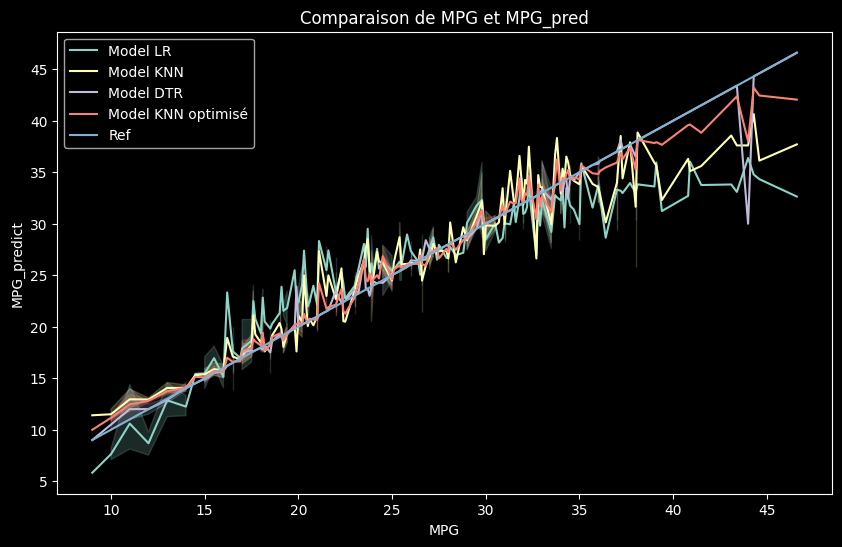

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mpg', y='pred_mpg_LR', data=df_clean_copy, label='Model LR')
sns.lineplot(x='mpg', y='pred_mpg_KNN', data=df_clean_copy, label='Model KNN')
sns.lineplot(x='mpg', y='pred_mpg_DTR', data=df_clean_copy, label='Model DTR')
sns.lineplot(x='mpg', y='pred_optim_mpg_KNN', data=df_clean_copy, label='Model KNN optimisé')
# sns.lineplot(x='mpg', y='pred_optim_mpg_DTR', data=df_clean_copy, label='Model DTR optimisé')
sns.lineplot(x='mpg', y='mpg', data=df_clean_copy, label='Ref')
plt.title('Comparaison de MPG et MPG_pred')
plt.xlabel('MPG')
plt.ylabel('MPG_predict')
plt.legend()
plt.show()

## Predictions futures fictives

In [ ]:
data_fictives = pd.DataFrame({
    'name': ['phantom roadster XR', 'europa velocity coupe', 'tokai sportster Z'],
    'mpg': [35.0, 28.0, 38.0],
    'cylinders': [4, 6, 4],
    'displacement': [150.0, 200.0, 180.0],
    'horsepower': [110.0, 145.0, 130.0],
    'weight': [2100, 2800, 2200],
    'acceleration': [16.0, 14.5, 17.8],
    'model_year': [85, 89, 87],
    'origin': ['usa', 'europe', 'japan'],
    'brand': ['phantom', 'europa', 'tokai']
})


future_mpg_predictions = knn.predict(data_fictives)
print("Prédictions de consommation future:", future_mpg_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names



ValueError: could not convert string to float: 'phantom roadster XR'